In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

import warnings 
warnings.filterwarnings('ignore')      

In [2]:
df=pd.read_csv('Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

# EDA

In [3]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.duplicated().sum()

0

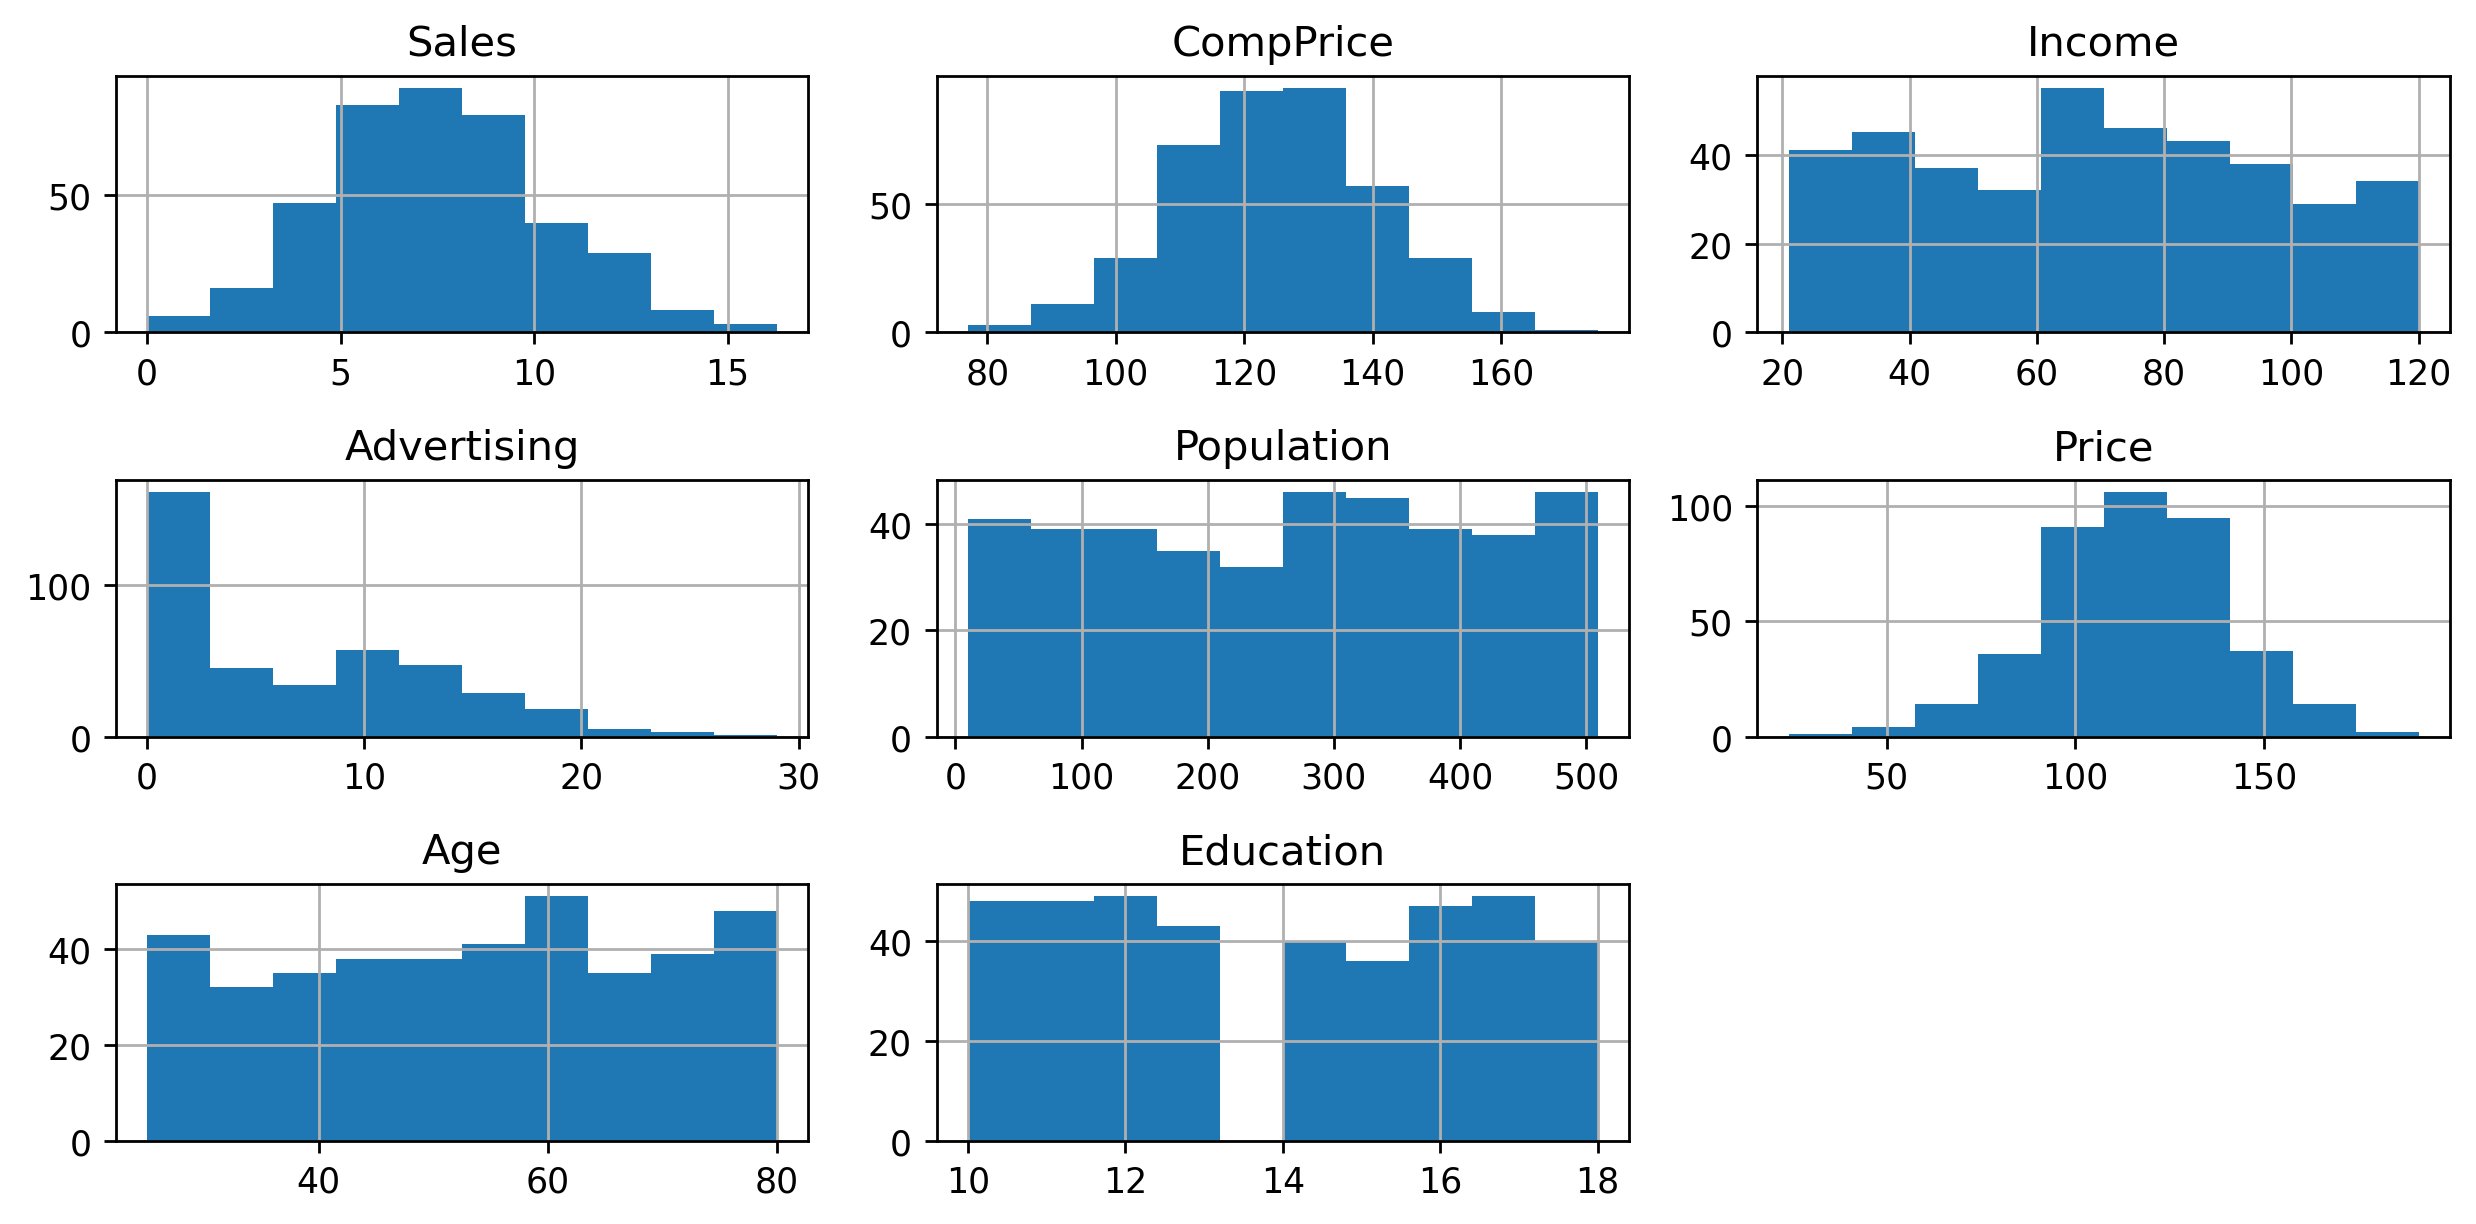

In [6]:
df.hist()
plt.tight_layout()

In [7]:
df.head(2)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes

<AxesSubplot:>

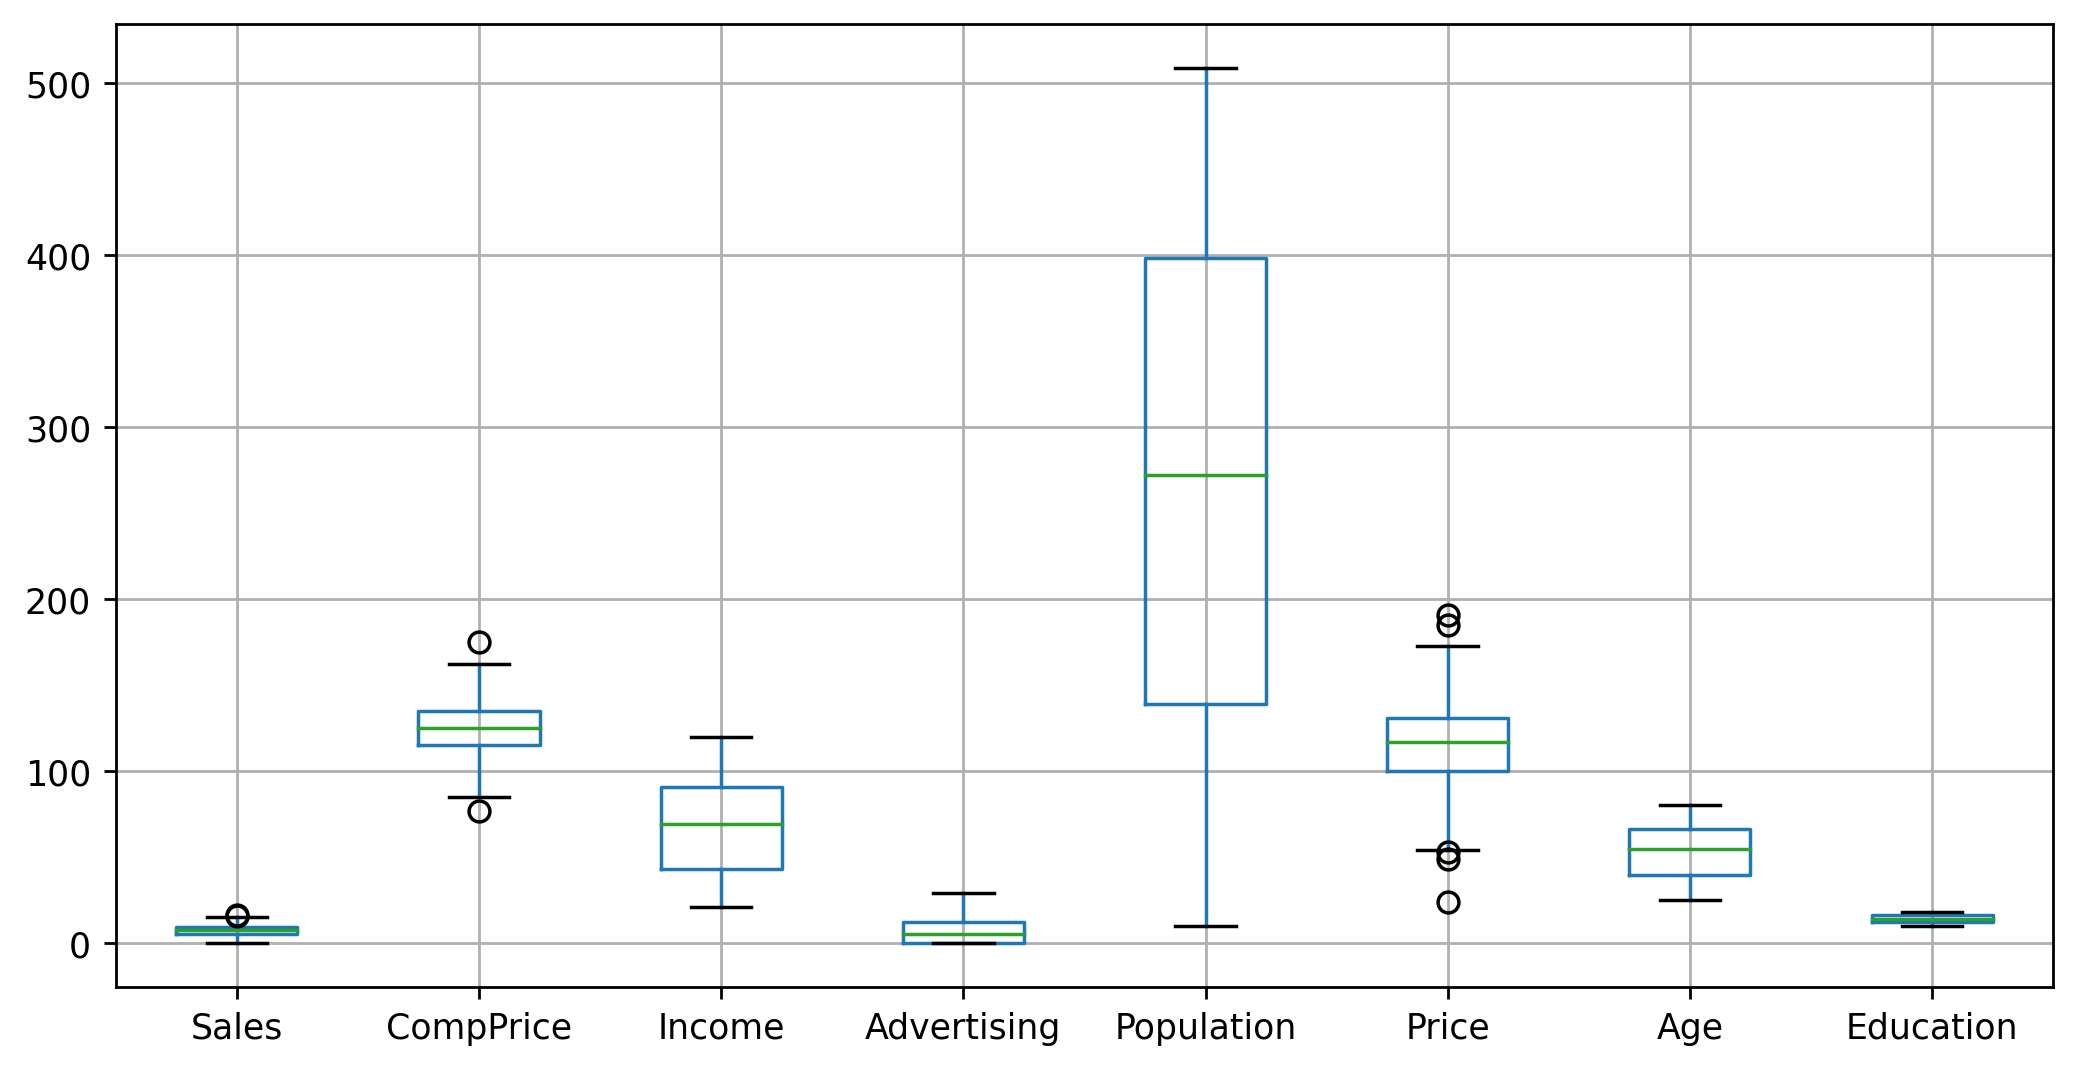

In [8]:
df.boxplot()

<AxesSubplot:xlabel='CompPrice'>

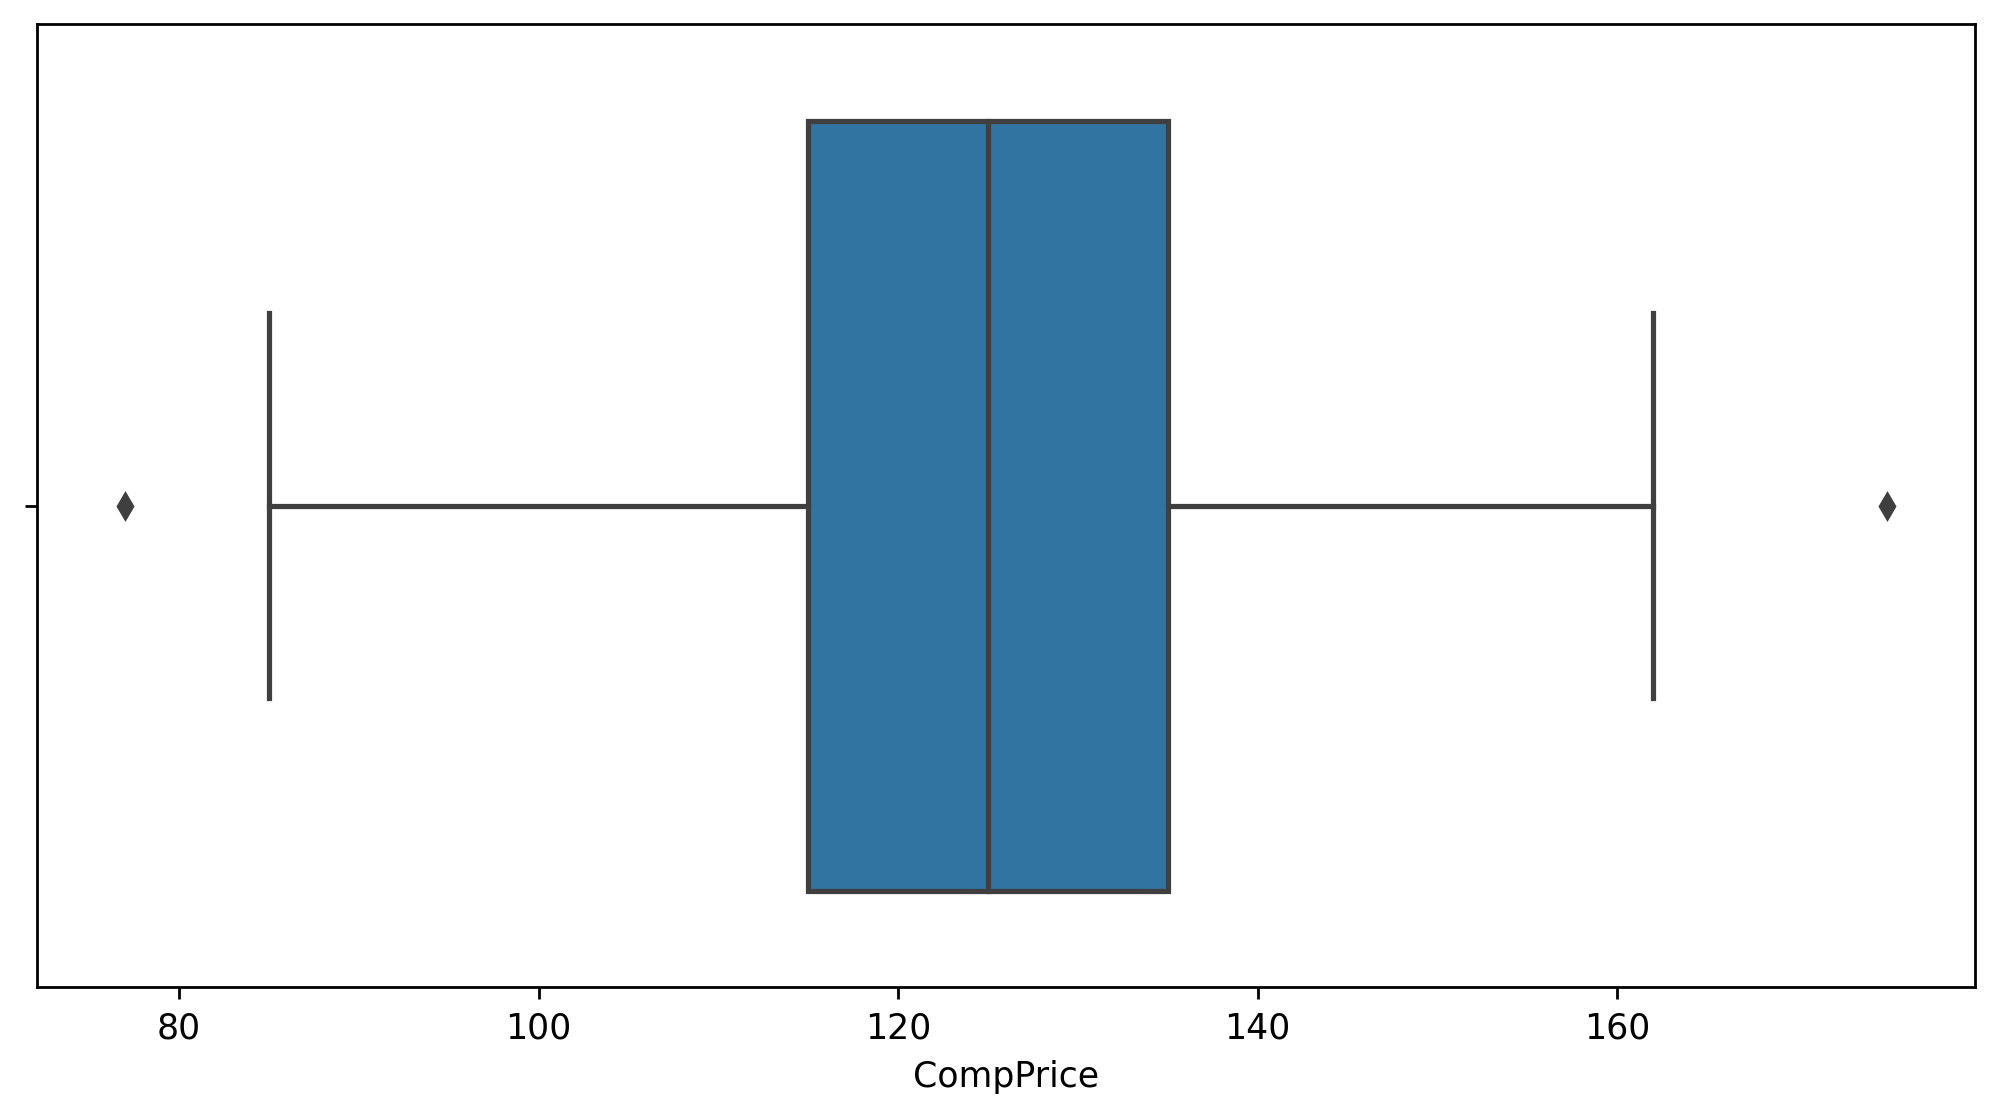

In [9]:
sns.boxplot(df['CompPrice'])

<AxesSubplot:xlabel='Price'>

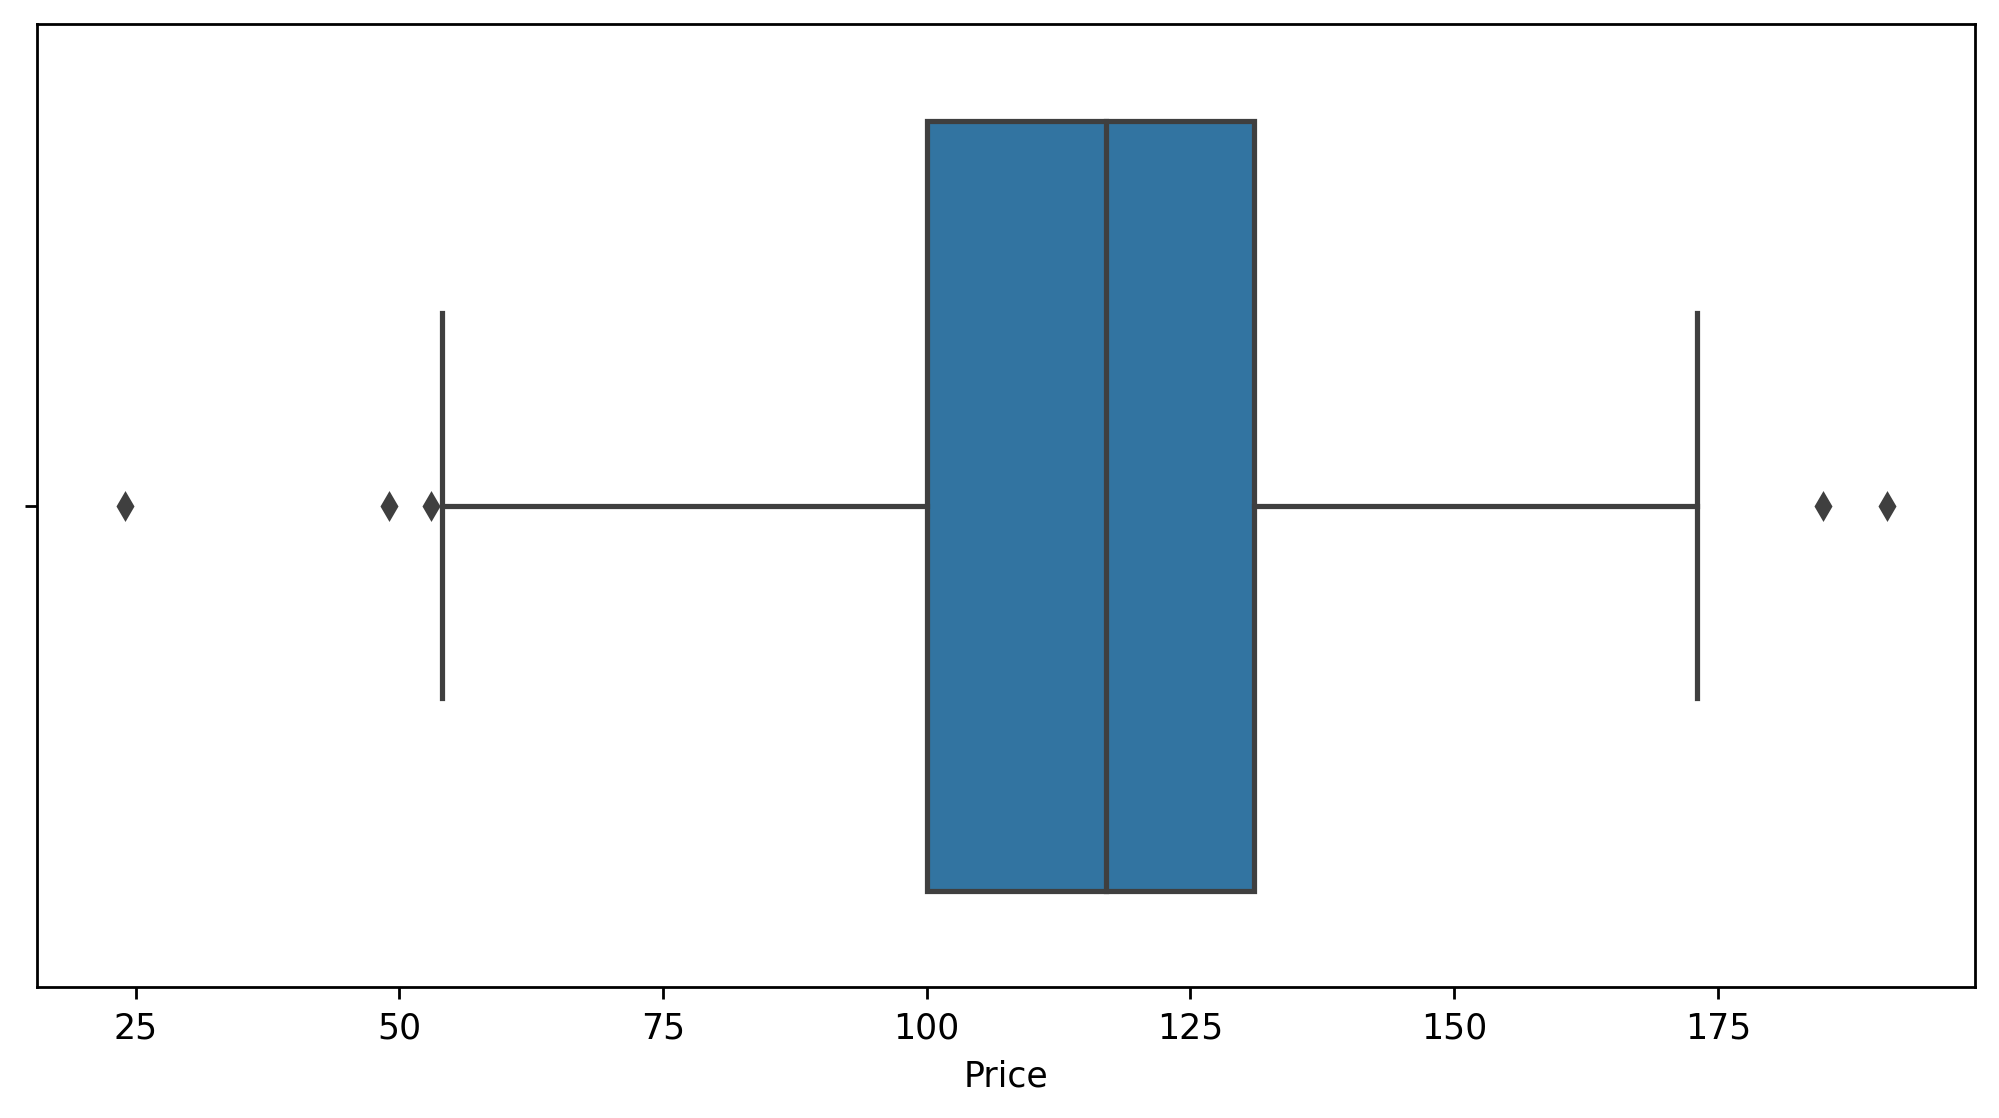

In [10]:
sns.boxplot(df['Price'])

In [11]:
def outlier_detection(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper=q3+(1.5)*iqr
    lower=q1-(1.5)*iqr
    
    return upper,lower

In [12]:
outlier_detection(df,'CompPrice')

(165.0, 85.0)

In [13]:
df[df['CompPrice']>165]=165

In [14]:
df[df['CompPrice']<85]=85

<AxesSubplot:xlabel='CompPrice'>

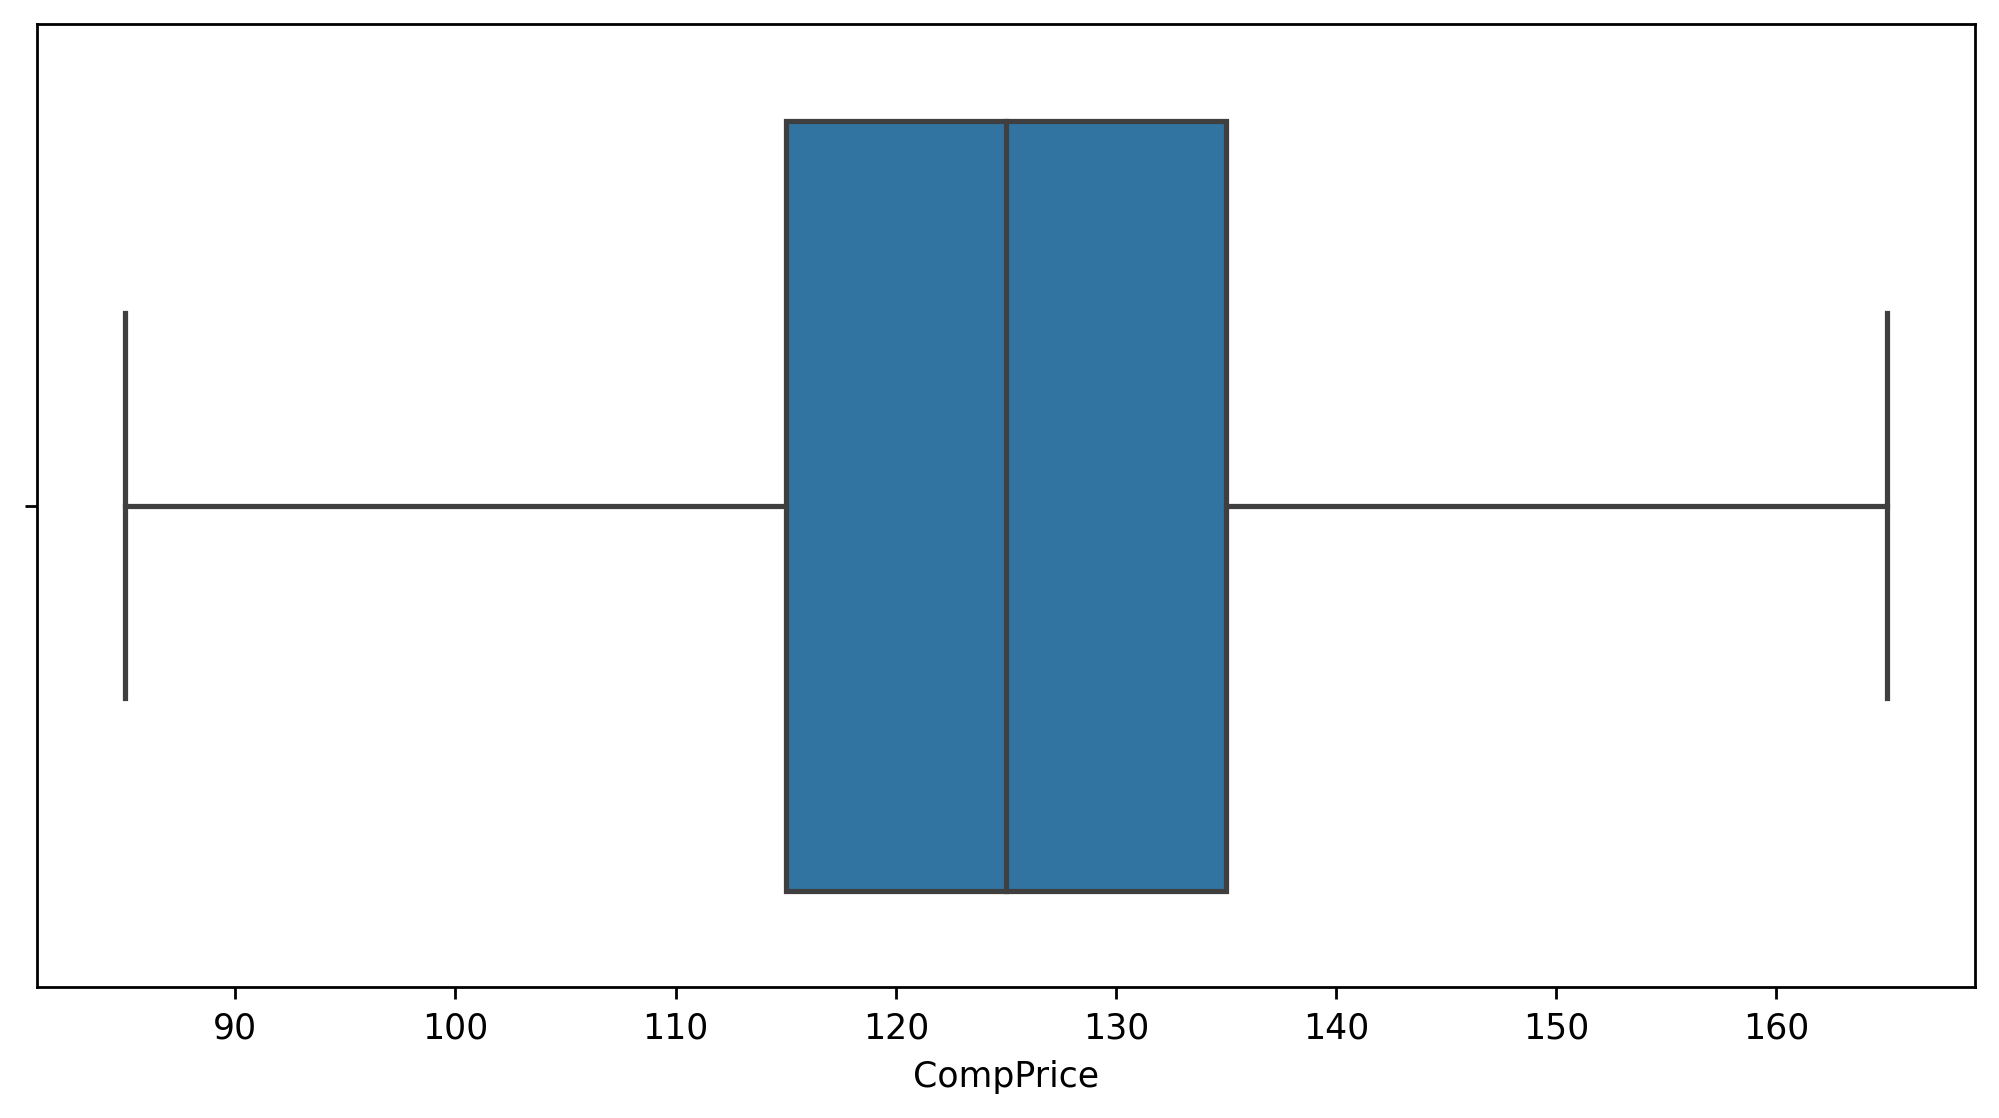

In [15]:
sns.boxplot(df['CompPrice'])

In [16]:
outlier_detection(df,'Price')

(177.5, 53.5)

In [17]:
df[df['Price']>177]=177

In [18]:
df[df['Price']<53.5]=53.5

<AxesSubplot:xlabel='Price'>

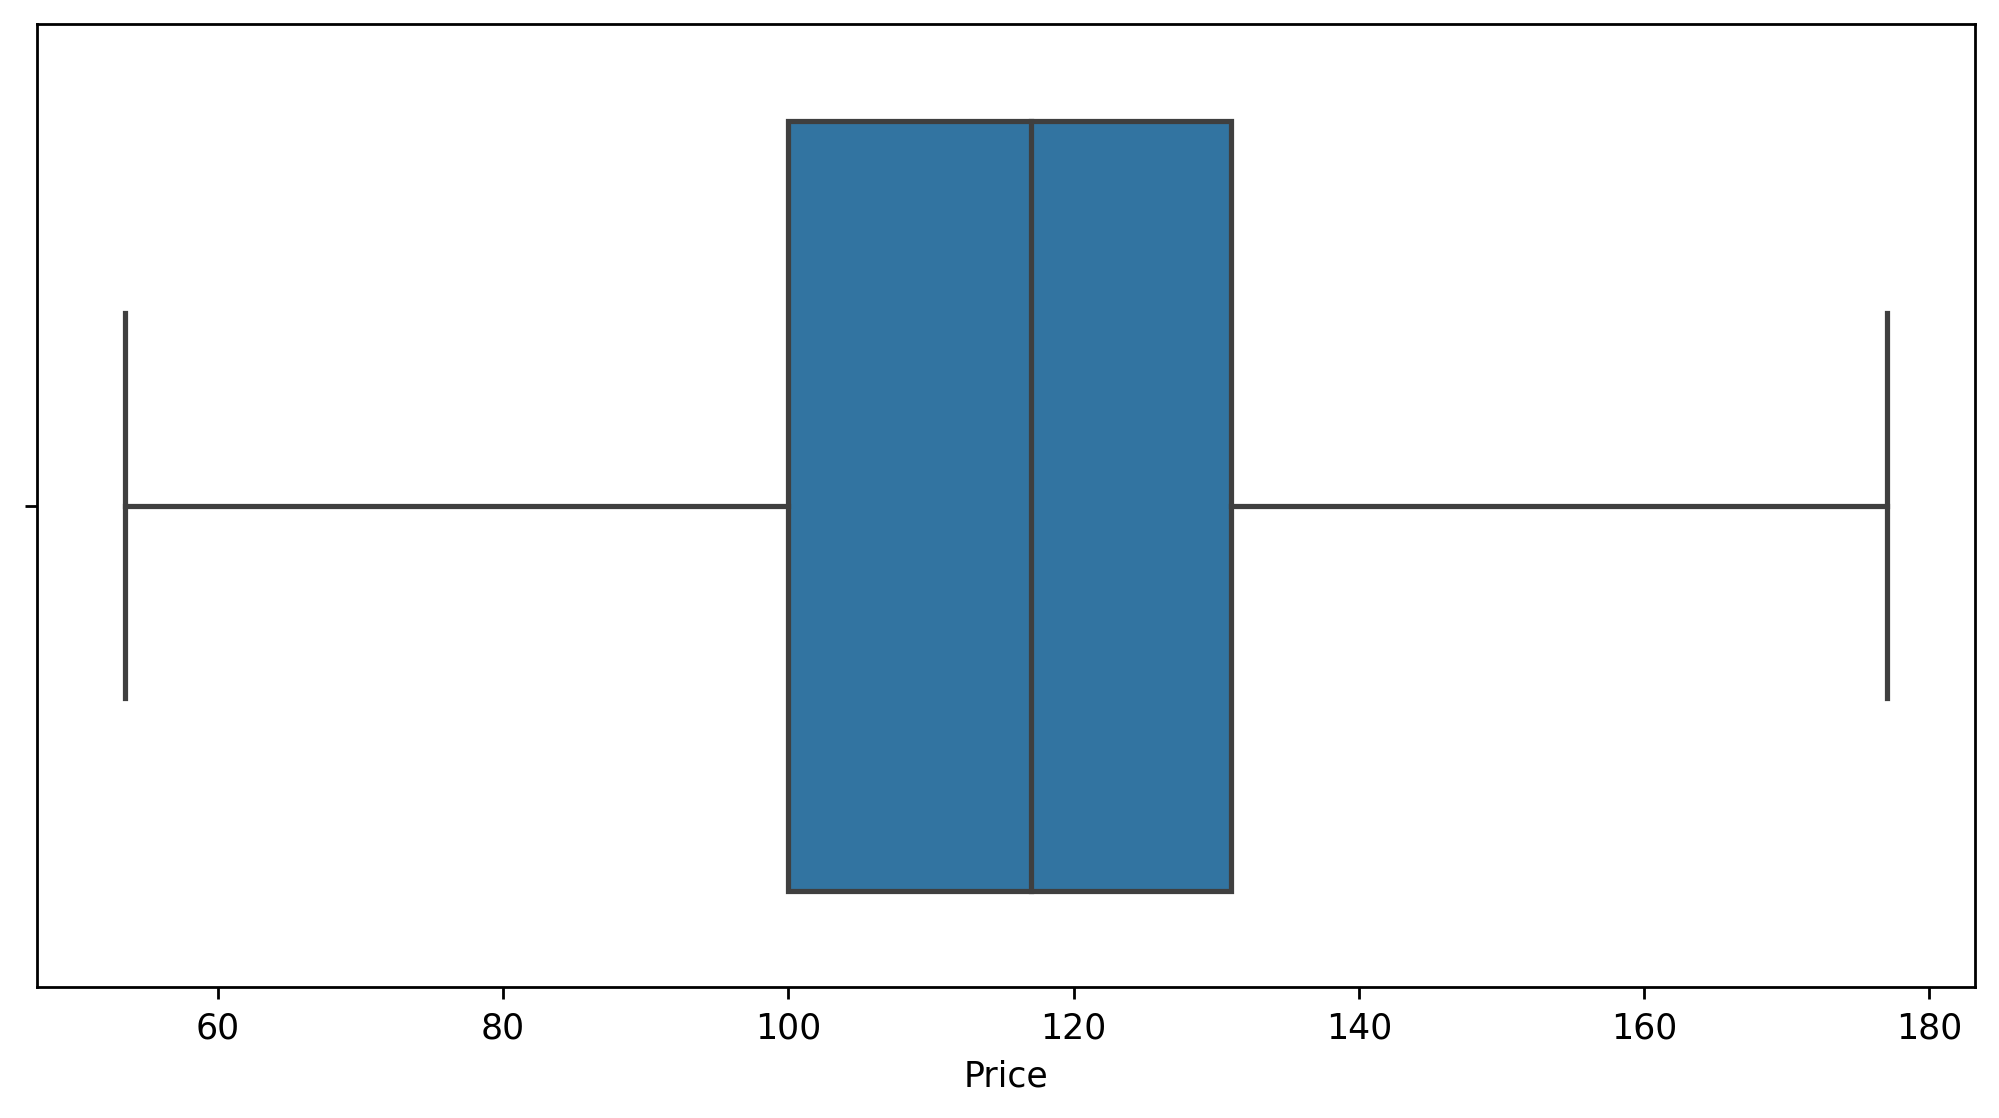

In [19]:
sns.boxplot(df['Price'])

In [20]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc   Age  \
0   9.50      138.0    73.0         11.0       276.0  120.0       Bad  42.0   
1  11.22      111.0    48.0         16.0       260.0   83.0      Good  65.0   
2  10.06      113.0    35.0         10.0       269.0   80.0    Medium  59.0   
3   7.40      117.0   100.0          4.0       466.0   97.0    Medium  55.0   
4   4.15      141.0    64.0          3.0       340.0  128.0       Bad  38.0   

   Education Urban   US  
0       17.0   Yes  Yes  
1       10.0   Yes  Yes  
2       12.0   Yes  Yes  
3       14.0   Yes  Yes  
4       13.0   Yes   No

In [69]:
sales_group=pd.cut(df.Sales,bins=[0,5,10,200],labels=['Low','Modarate','High'])


In [70]:
df['sales_group']=sales_group

In [71]:
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  \
0      9.50      138.0    73.0         11.0       276.0  120.0       Bad   
1     11.22      111.0    48.0         16.0       260.0   83.0      Good   
2     10.06      113.0    35.0         10.0       269.0   80.0    Medium   
3      7.40      117.0   100.0          4.0       466.0   97.0    Medium   
4      4.15      141.0    64.0          3.0       340.0  128.0       Bad   
5     10.81      124.0   113.0         13.0       501.0   72.0       Bad   
6      6.63      115.0   105.0          0.0        45.0  108.0    Medium   
7     11.85      136.0    81.0         15.0       425.0  120.0      Good   
8      6.54      132.0   110.0          0.0       108.0  124.0    Medium   
9      4.69      132.0   113.0          0.0       131.0  124.0    Medium   
10     9.01      121.0    78.0          9.0       150.0  100.0       Bad   
11    11.96      117.0    94.0          4.0       503.0   94.0      Good   
12     3.98      122.0    35.0          2.0       393.0  136.0    Medium   
13    10.96      115.0    28.0         11.0        29.0   86.0      Good   
14    11.17      107.0   117.0         11.0       148.0  118.0      Good   
15     8.71      149.0    95.0          5.0       400.0  144.0    Medium   
16     7.58      118.0    32.0          0.0       284.0  110.0      Good   
17    12.29      147.0    74.0         13.0       251.0  131.0      Good   
18    13.91      110.0   110.0          0.0       408.0   68.0      Good   
19     8.73      129.0    76.0         16.0        58.0  121.0    Medium   
20     6.41      125.0    90.0          2.0       367.0  131.0    Medium   
21    12.13      134.0    29.0         12.0       239.0  109.0      Good   
22     5.08      128.0    46.0          6.0       497.0  138.0    Medium   
23     5.87      121.0    31.0          0.0       292.0  109.0    Medium   
24    10.14      145.0   119.0         16.0       294.0  113.0       Bad   
25    14.90      139.0    32.0          0.0       176.0   82.0      Good   
26     8.33      107.0   115.0         11.0       496.0  131.0      Good   
27     5.27       98.0   118.0          0.0        19.0  107.0    Medium   
28     2.99      103.0    74.0          0.0       359.0   97.0       Bad   
29     7.81      104.0    99.0         15.0       226.0  102.0       Bad   
30    13.55      125.0    94.0          0.0       447.0   89.0      Good   
31     8.25      136.0    58.0         16.0       241.0  131.0    Medium   
32     6.20      107.0    32.0         12.0       236.0  137.0      Good   
33     8.77      114.0    38.0         13.0       317.0  128.0      Good   
34     2.67      115.0    54.0          0.0       406.0  128.0    Medium   
35    11.07      131.0    84.0         11.0        29.0   96.0    Medium   
36     8.89      122.0    76.0          0.0       270.0  100.0      Good   
37     4.95      121.0    41.0          5.0       412.0  110.0    Medium   
38     6.59      109.0    73.0          0.0       454.0  102.0    Medium   
39     3.24      130.0    60.0          0.0       144.0  138.0       Bad   
40     2.07      119.0    98.0          0.0        18.0  126.0       Bad   
41     7.96      157.0    53.0          0.0       403.0  124.0       Bad   
42    85.00       85.0    85.0         85.0        85.0   85.0    Medium   
43     4.12      123.0    42.0         11.0        16.0  134.0    Medium   
44     4.16       85.0    79.0          6.0       325.0   95.0    Medium   
45     4.56      141.0    63.0          0.0       168.0  135.0       Bad   
46    12.44      127.0    90.0         14.0        16.0   70.0    Medium   
47     4.38      126.0    98.0          0.0       173.0  108.0       Bad   
48     3.91      116.0    52.0          0.0       349.0   98.0       Bad   
49    10.61      157.0    93.0          0.0        51.0  149.0      Good   
50     1.42       99.0    32.0         18.0       341.0  108.0       Bad   
51     4.42      121.0    90.0          0.0       150.

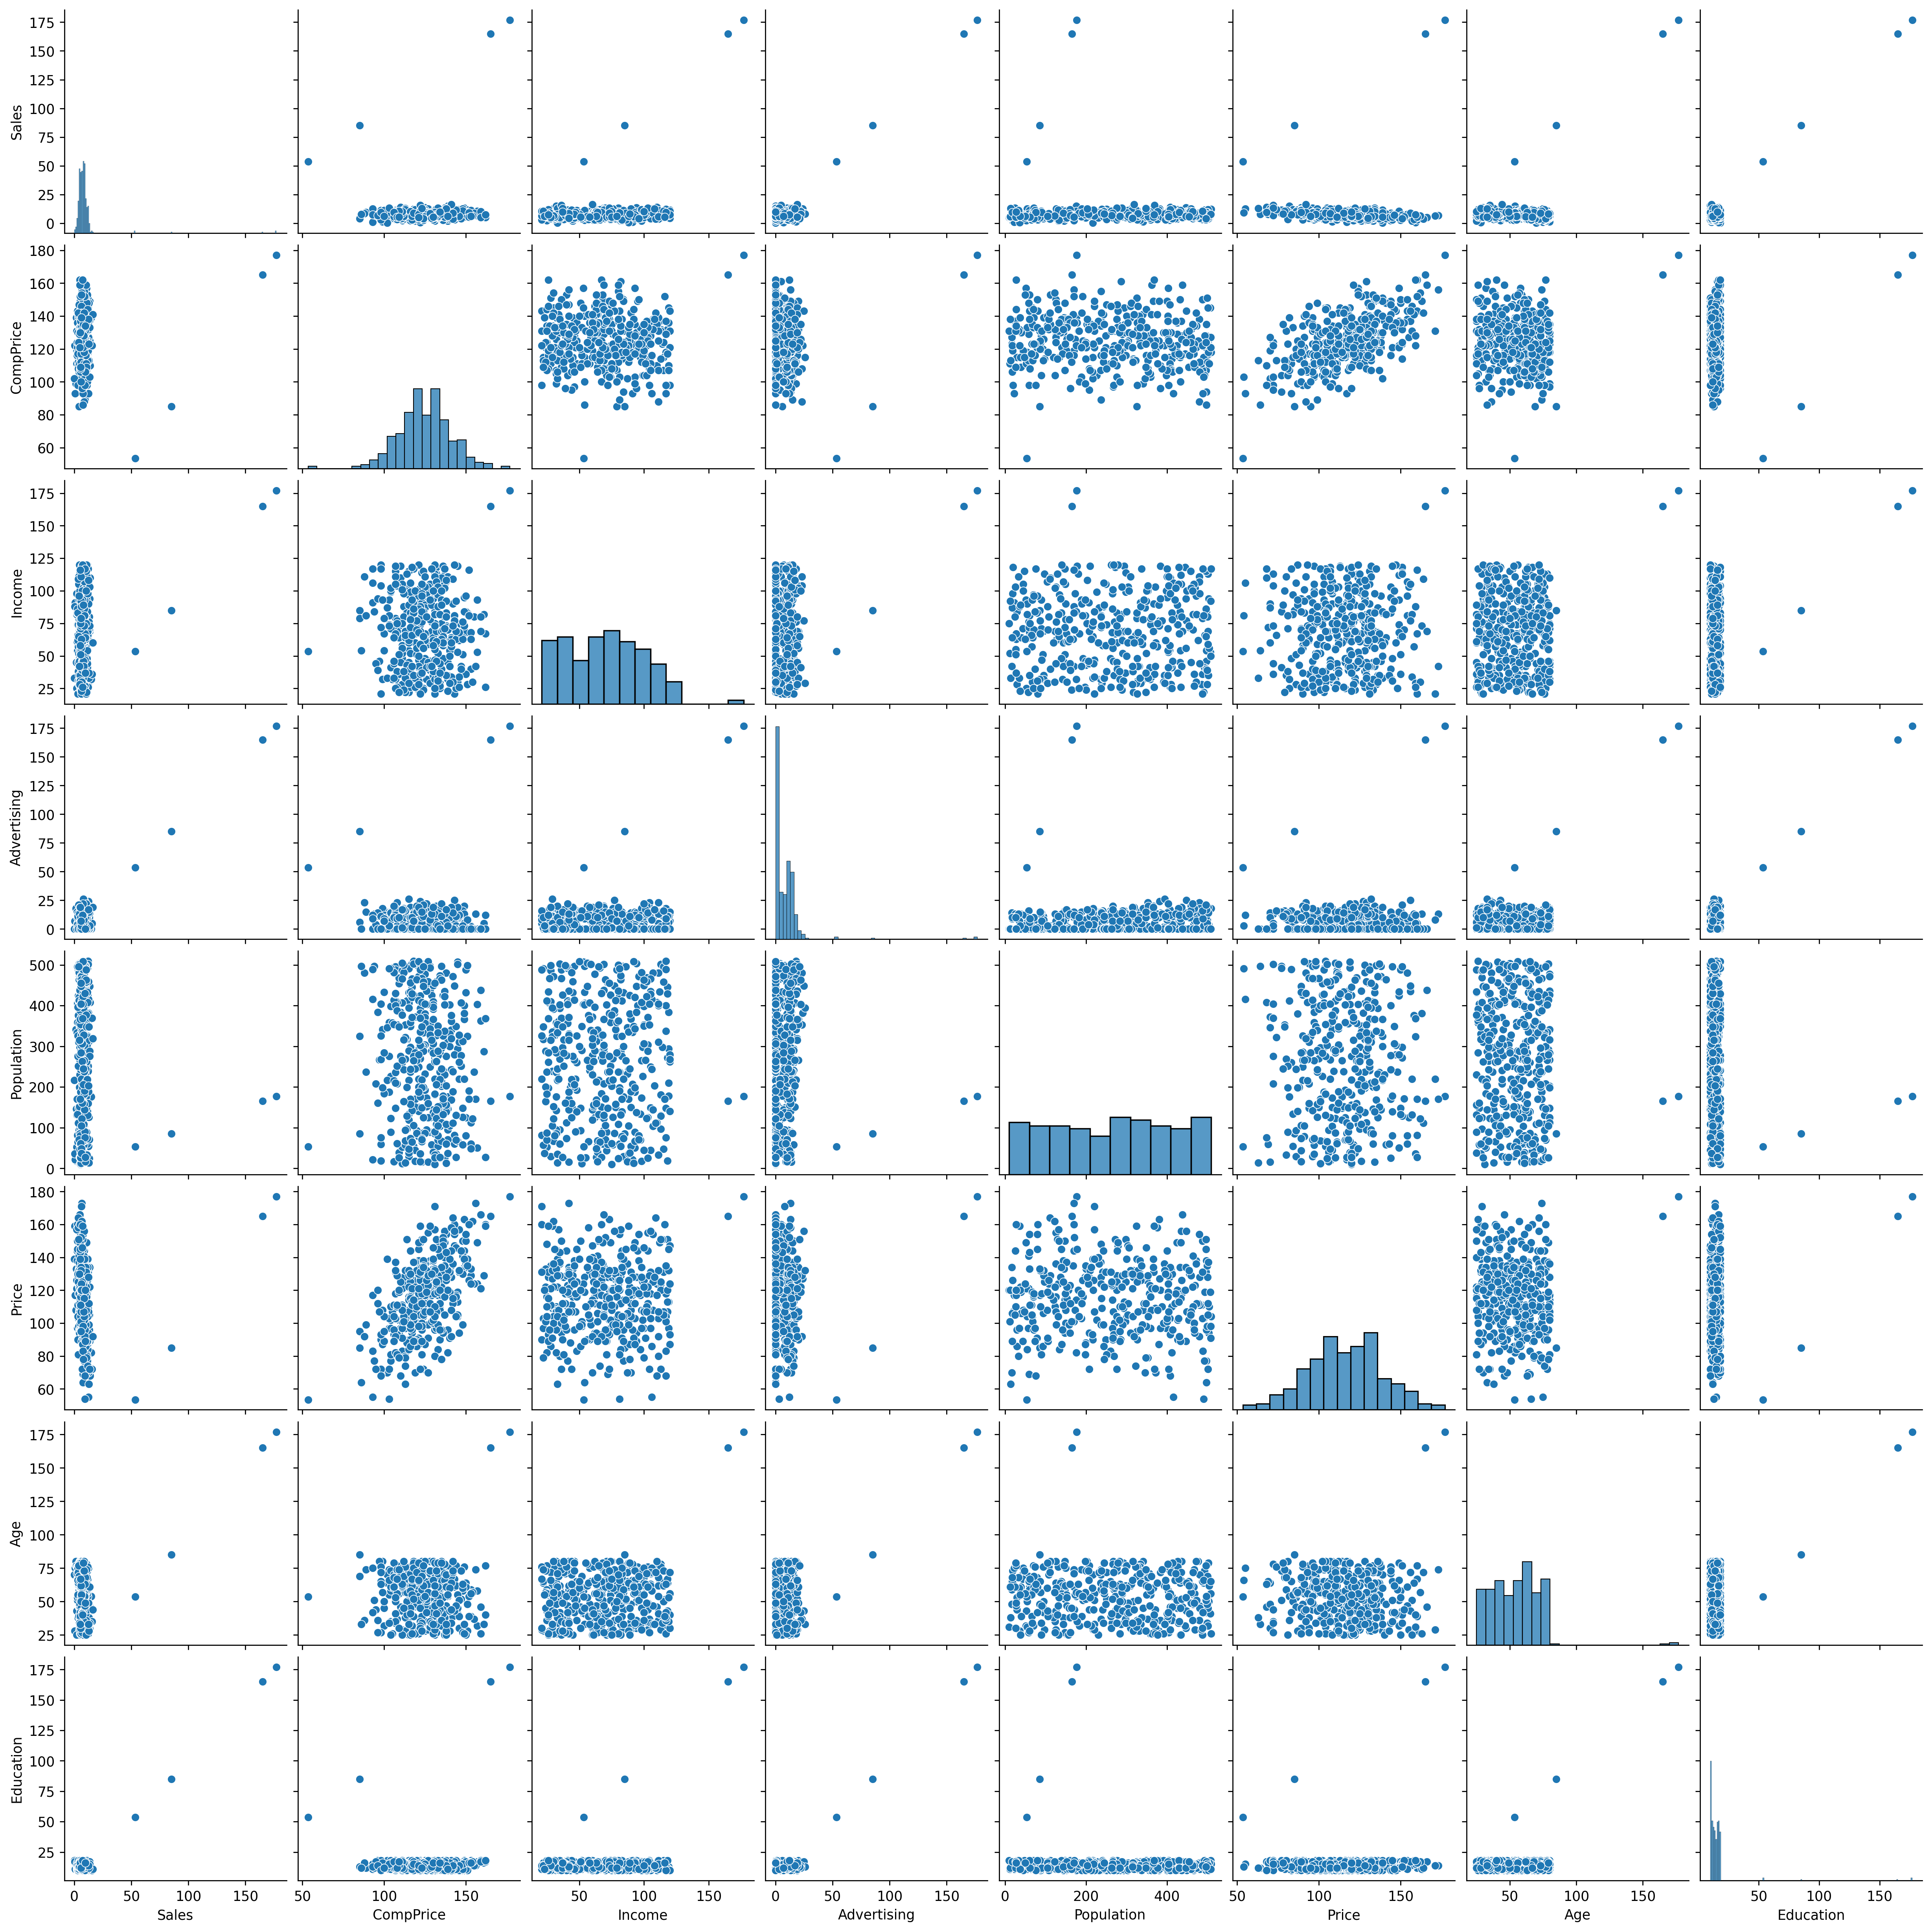

In [24]:
sns.pairplot(df)

In [82]:
df.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.160373  0.308080     0.924172   -0.076550  0.072117   
CompPrice    0.160373   1.000000  0.028265     0.107054   -0.085159  0.598385   
Income       0.308080   0.028265  1.000000     0.289278   -0.019428  0.042429   
Advertising  0.924172   0.107054  0.289278     1.000000    0.020842  0.137412   
Population  -0.076550  -0.085159 -0.019428     0.020842    1.000000 -0.022519   
Price        0.072117   0.598385  0.042429     0.137412   -0.022519  1.000000   
Age          0.485046   0.046607  0.169149     0.485164   -0.077018  0.017528   
Education    0.966153   0.161271  0.277778     0.902994   -0.100907  0.155974   

                  Age  Education  
Sales        0.485046   0.966153  
CompPrice    0.046607   0.161271  
Income       0.169149   0.277778  
Advertising  0.485164   0.902994  
Population  -0.077018  -0.100907  
Price        0.017528   0.155974  
Age          1.000000   0.524941  
Education    0.524941   1.000000

<AxesSubplot:>

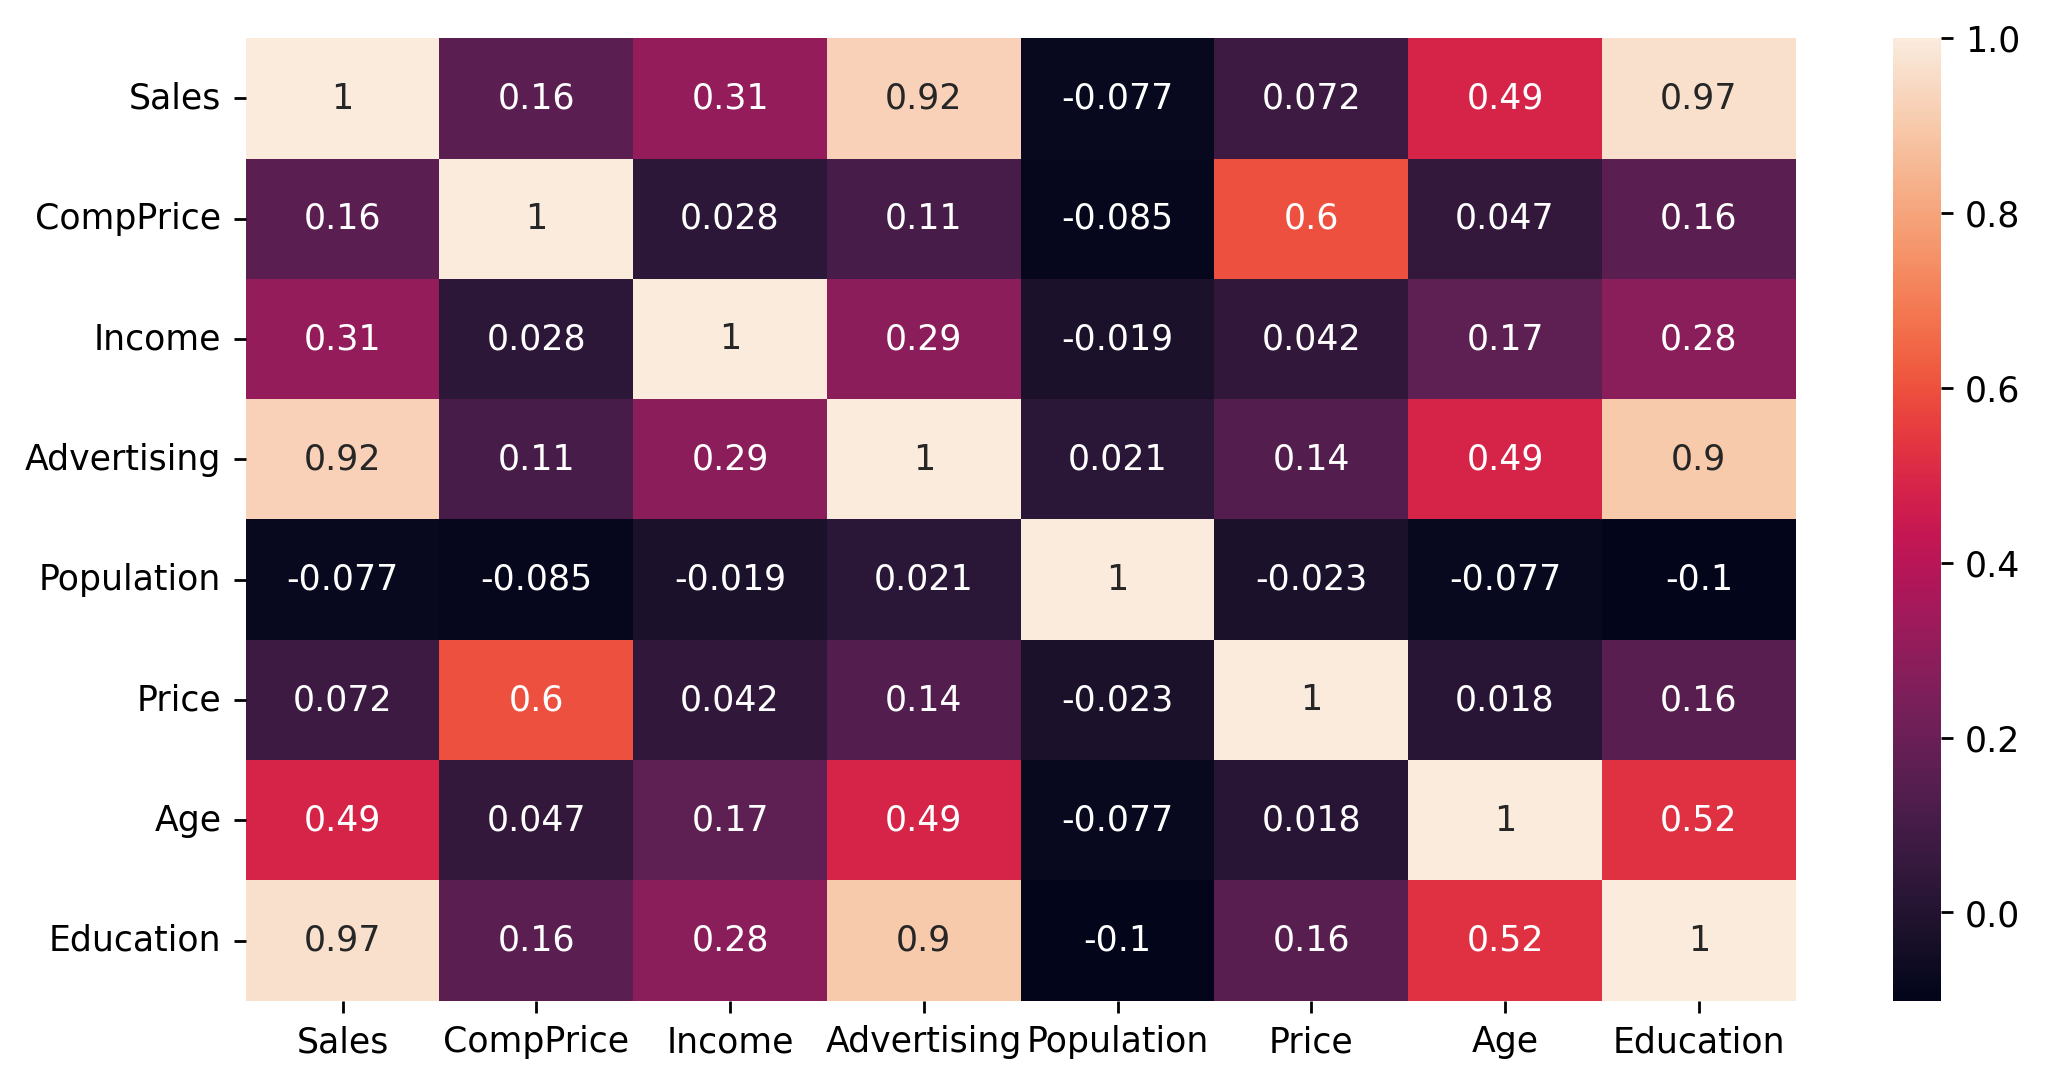

In [85]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='sales_group', ylabel='count'>

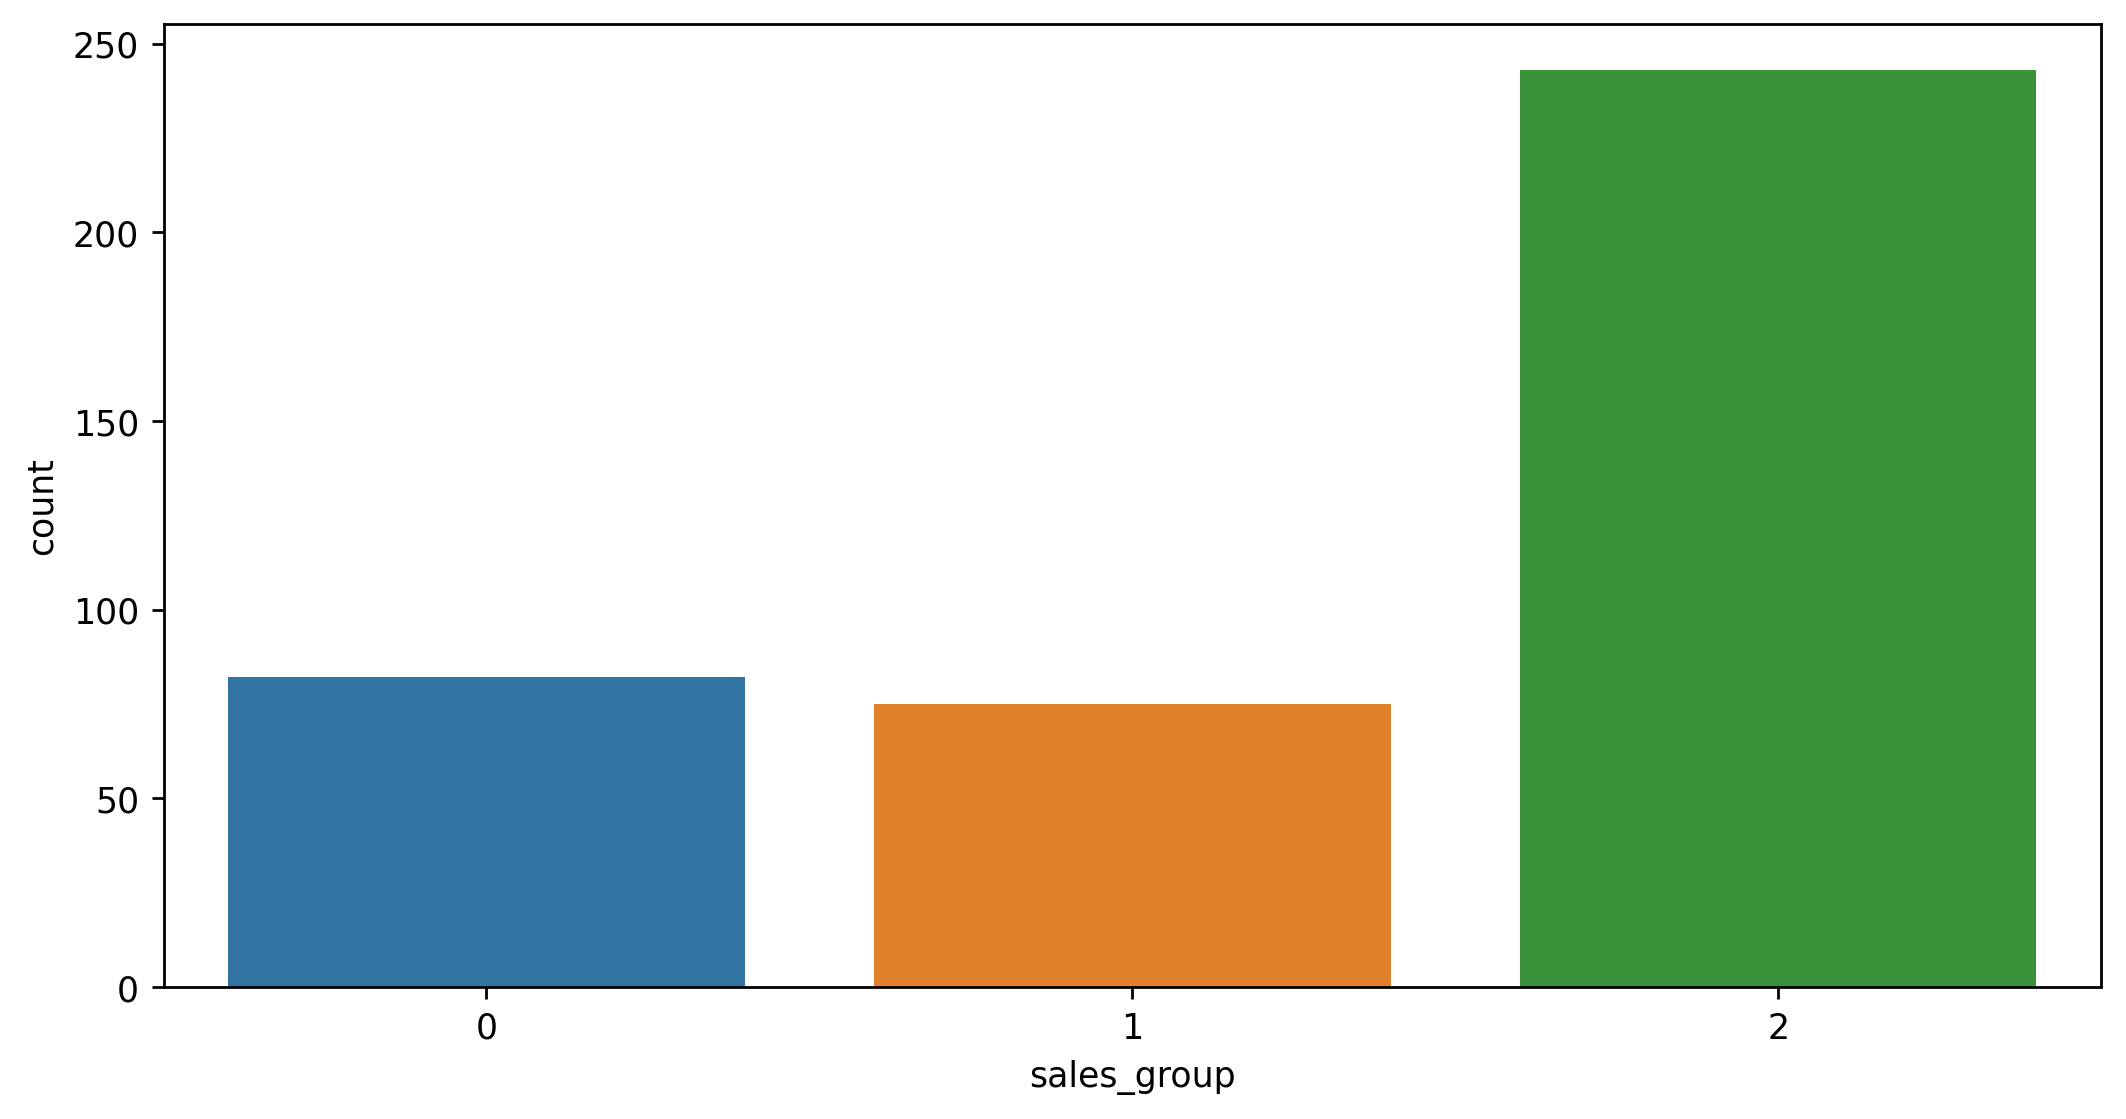

In [188]:
sns.countplot(df['sales_group'])

In [26]:
df['Urban'].unique()

array(['Yes', 'No', 85, 53.5, 177, 165], dtype=object)

In [27]:
df['US'].unique()

array(['Yes', 'No', 85, 53.5, 177, 165], dtype=object)

In [31]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium', 85, 53.5, 177, 165], dtype=object)

In [29]:
df['Urban']=df['Urban'].replace(85,np.nan)
df['Urban']=df['Urban'].replace(53.5,np.nan)
df['Urban']=df['Urban'].replace(177,np.nan)
df['Urban']=df['Urban'].replace(165,np.nan)

In [30]:
df['Urban'].unique()

array(['Yes', 'No', nan], dtype=object)

In [32]:
df['US']=df['US'].replace(85,np.nan)
df['US']=df['US'].replace(53.5,np.nan)
df['US']=df['US'].replace(177,np.nan)
df['US']=df['US'].replace(165,np.nan)

In [33]:
df['US'].unique()

array(['Yes', 'No', nan], dtype=object)

In [34]:
df['ShelveLoc']=df['ShelveLoc'].replace(85,np.nan)
df['ShelveLoc']=df['ShelveLoc'].replace(53.5,np.nan)
df['ShelveLoc']=df['ShelveLoc'].replace(177,np.nan)
df['ShelveLoc']=df['ShelveLoc'].replace(165,np.nan)

In [35]:
df['ShelveLoc'].unique()

array(['Bad', 'Good', 'Medium', nan], dtype=object)

In [37]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      6
Age            0
Education      0
Urban          6
US             6
sales_group    6
dtype: int64

In [38]:
df['ShelveLoc'].mode()

0    Medium
Name: ShelveLoc, dtype: object

In [42]:
df['ShelveLoc']=df['ShelveLoc'].replace(np.nan,'Medium')

In [44]:
df['Urban'].mode()

0    Yes
Name: Urban, dtype: object

In [45]:
df['Urban']=df['Urban'].replace(np.nan,'Yes')

In [46]:
df['US'].mode()

0    Yes
Name: US, dtype: object

In [47]:
df['US']=df['US'].replace(np.nan,'Yes')

In [72]:
df['sales_group'].unique()

['Modarate', 'High', 'Low']
Categories (3, object): ['Low' < 'Modarate' < 'High']

In [73]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales_group    0
dtype: int64

<AxesSubplot:xlabel='Urban', ylabel='count'>

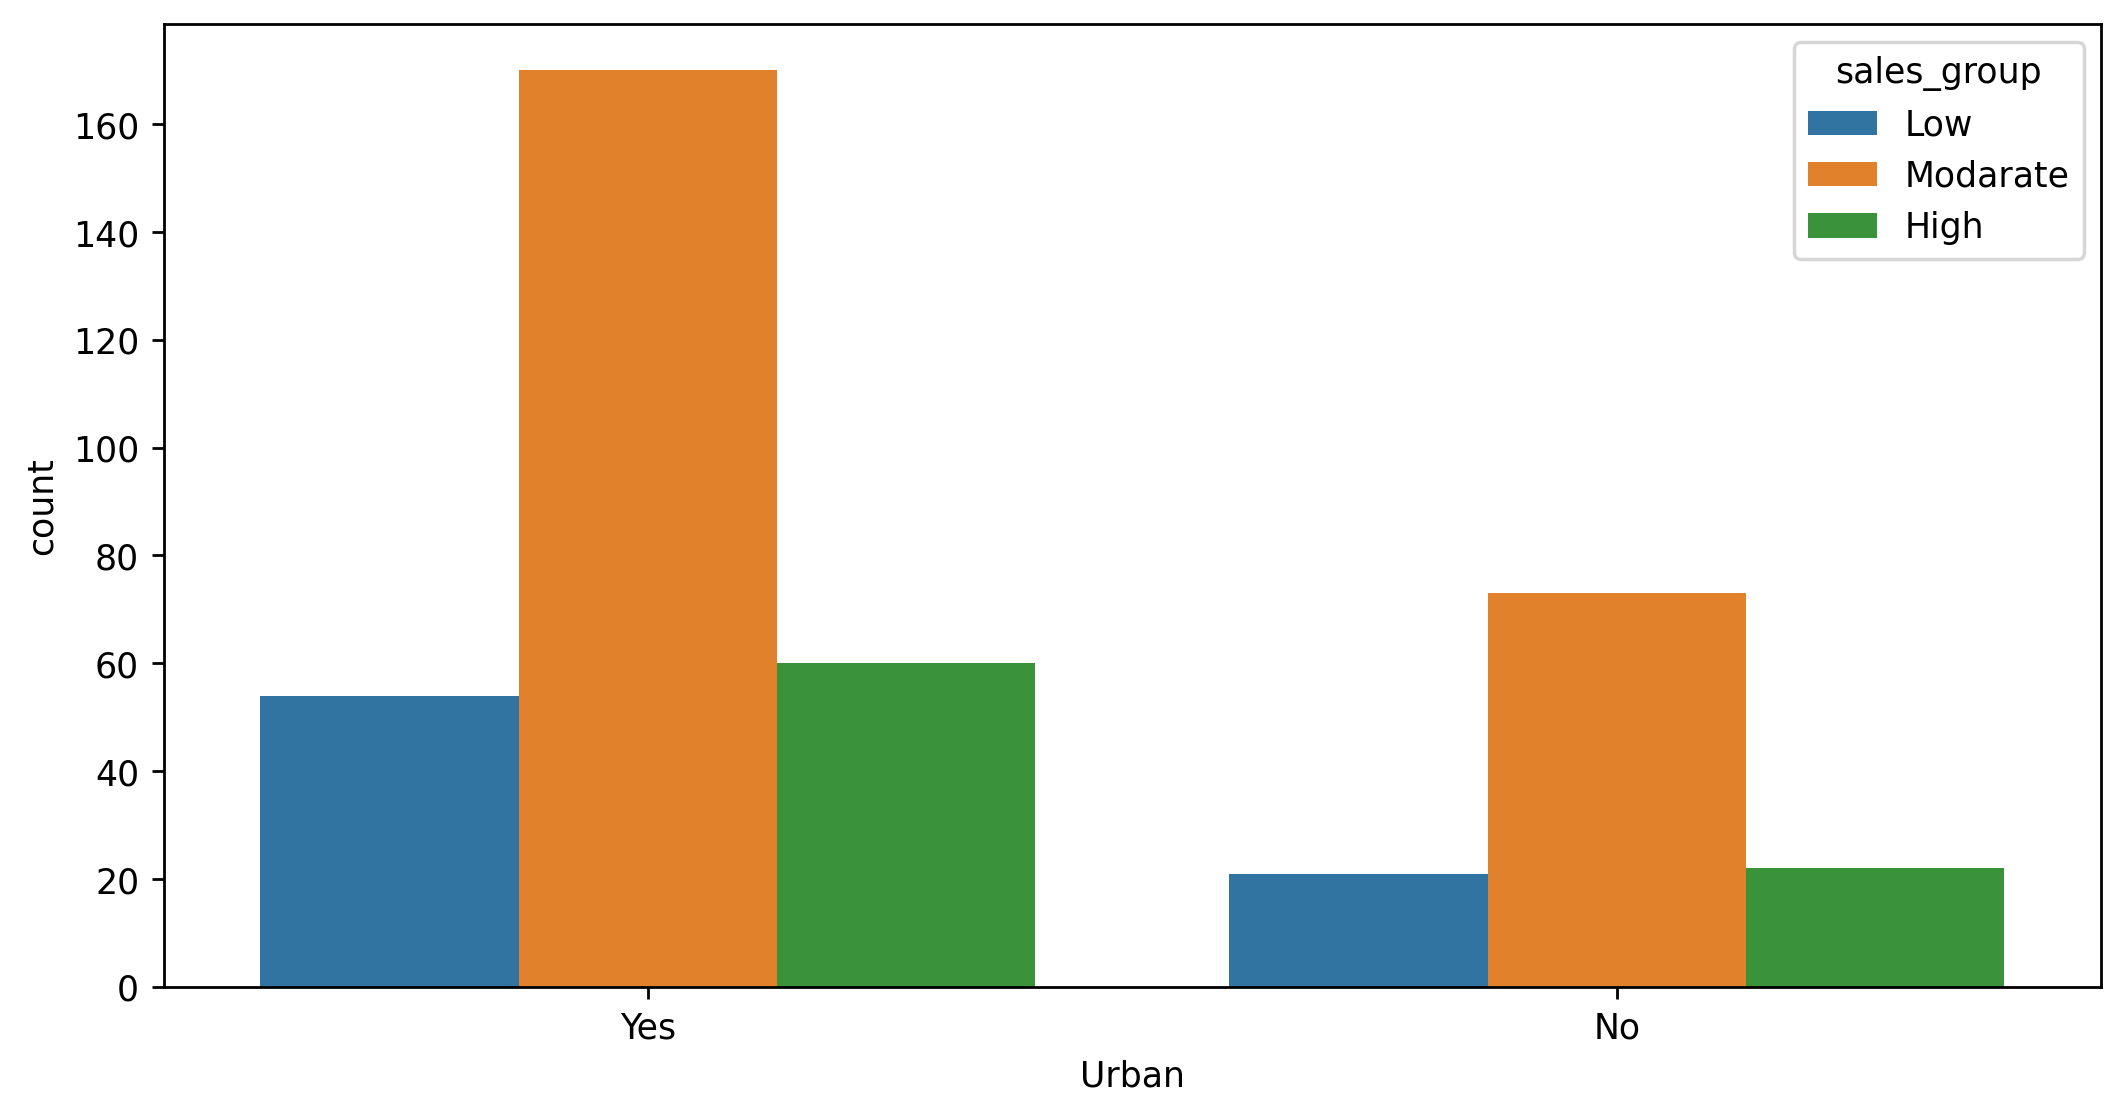

In [77]:
sns.countplot(df['Urban'],hue=df['sales_group'])

In [78]:
# Urban area affects the sale

In [79]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc   Age  \
0   9.50      138.0    73.0         11.0       276.0  120.0       Bad  42.0   
1  11.22      111.0    48.0         16.0       260.0   83.0      Good  65.0   
2  10.06      113.0    35.0         10.0       269.0   80.0    Medium  59.0   
3   7.40      117.0   100.0          4.0       466.0   97.0    Medium  55.0   
4   4.15      141.0    64.0          3.0       340.0  128.0       Bad  38.0   

   Education Urban   US sales_group  
0       17.0   Yes  Yes    Modarate  
1       10.0   Yes  Yes        High  
2       12.0   Yes  Yes        High  
3       14.0   Yes  Yes    Modarate  
4       13.0   Yes   No         Low

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

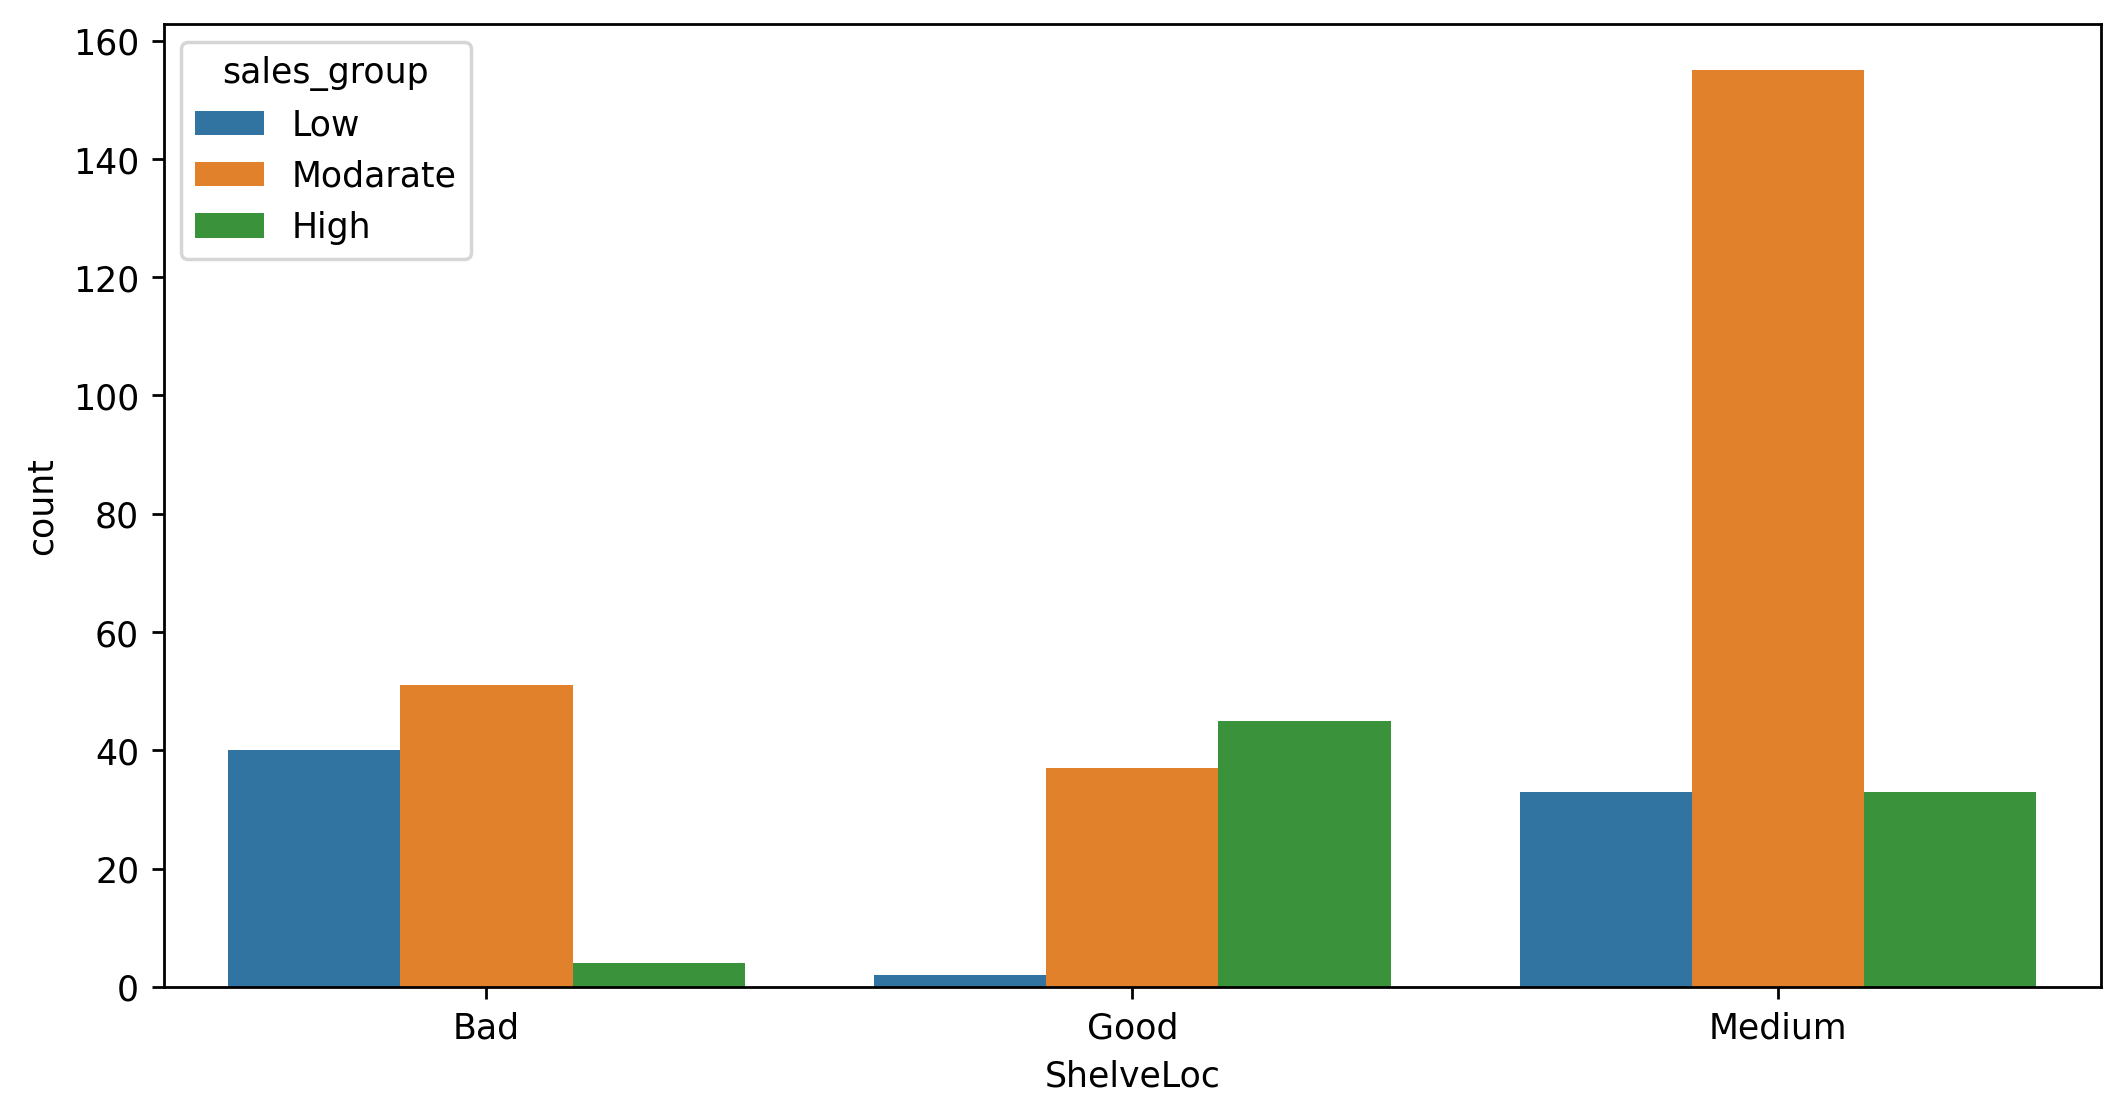

In [80]:
sns.countplot(df['ShelveLoc'],hue=df['sales_group'])

<AxesSubplot:xlabel='US', ylabel='count'>

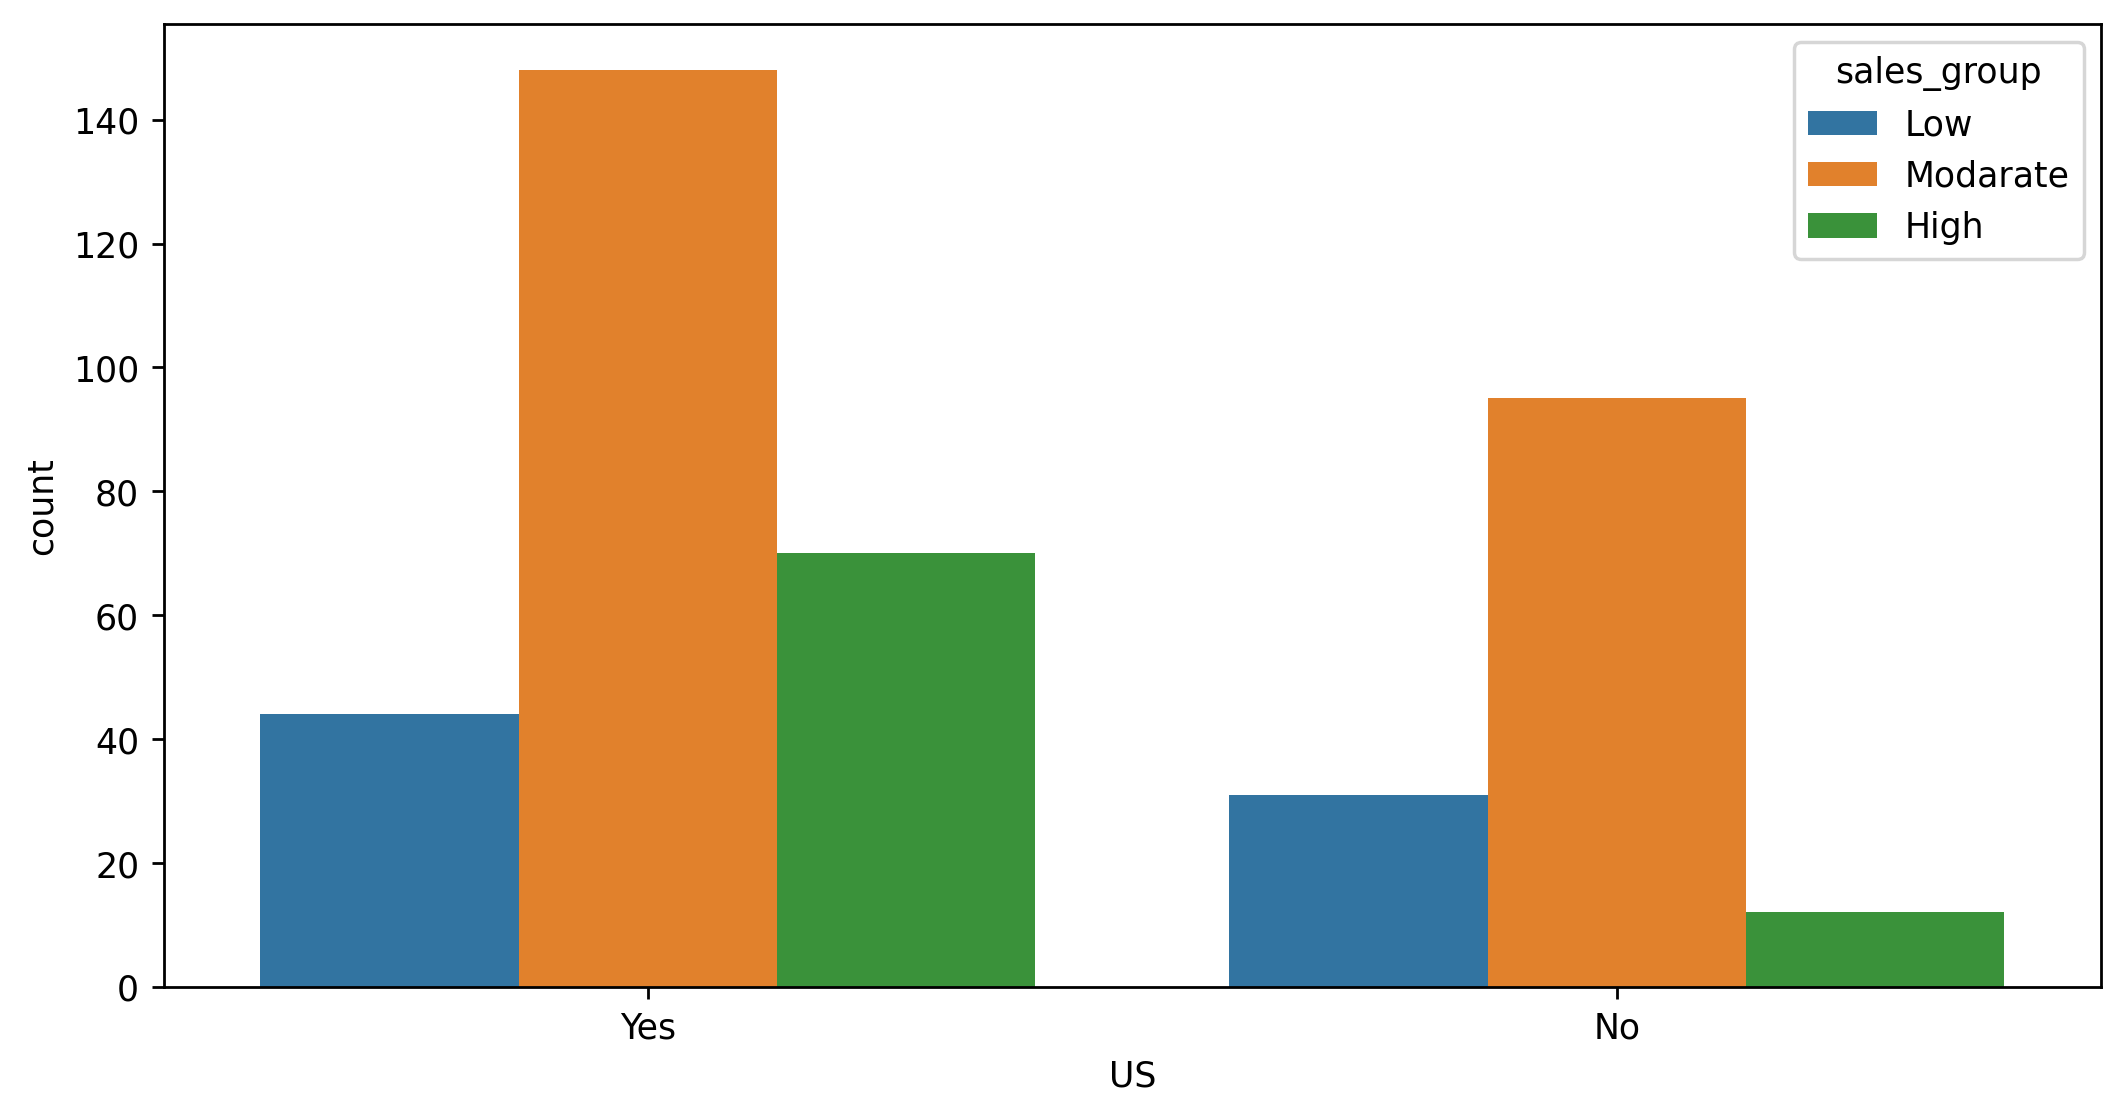

In [81]:
sns.countplot(df['US'],hue=df['sales_group'])

# Encoding

In [86]:
le=LabelEncoder()
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])

In [92]:
df['Urban']=le.fit_transform(df['Urban'])

In [93]:
df['US']=le.fit_transform(df['US'])

In [95]:
df['sales_group']=le.fit_transform(df['sales_group'])

In [96]:
df.head()

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc   Age  \
0   9.50      138.0    73.0         11.0       276.0  120.0          0  42.0   
1  11.22      111.0    48.0         16.0       260.0   83.0          1  65.0   
2  10.06      113.0    35.0         10.0       269.0   80.0          2  59.0   
3   7.40      117.0   100.0          4.0       466.0   97.0          2  55.0   
4   4.15      141.0    64.0          3.0       340.0  128.0          0  38.0   

   Education  Urban  US  sales_group  
0       17.0      1   1            2  
1       10.0      1   1            0  
2       12.0      1   1            0  
3       14.0      1   1            2  
4       13.0      1   0            1

# Model Building

In [99]:
x=df.iloc[:,1:-1]
y=df.iloc[:,-1]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
xtrain, xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [163]:
dt=DecisionTreeClassifier(criterion="entropy")
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array([1, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       2, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1])

In [104]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62        14
           1       0.43      0.62      0.51        16
           2       0.73      0.66      0.69        50

    accuracy                           0.64        80
   macro avg       0.61      0.62      0.61        80
weighted avg       0.66      0.64      0.64        80



In [165]:
print('Training Accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training Accuracy: 1.0
Testing Accuracy: 0.6375


# Hyperparameter tuninig

In [116]:
from sklearn.model_selection import GridSearchCV

In [169]:
params={'criterion':["gini", "entropy"],
        'splitter' :["best", "random"],
        'max_depth':[1,2,3,4,5] ,
         'min_samples_split':[2,3,4,5,6,7],
         'min_samples_leaf':[1,2,3,4]}

In [170]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid=params,verbose=2)

In [171]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, m

[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=2, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=1, min_samples_leaf=3, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=3, splitter=

[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=2, min_samples_split=6, splitte

[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=2, min_samples_leaf=3, min_samples_split=7, splitter=ra

[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=ra

[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=3, min_samples_split=7, splitte

[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=1, min_samples_split=3, splitte

[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=2, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=3, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=3, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5, splitte

[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, splitter=ra

[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=1, min_samples_split=2

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=2, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=3, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=1, m

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_leaf=3, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, m

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=3, min_s

[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=1, m

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=2, min_s

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=3, min_s

[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=6, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_leaf=4, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=2, m

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_samples_split=4, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=3, min_s

[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=4, min

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']},
             verbose=2)

In [172]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'random'}

# Final Model

In [173]:
dt=DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_leaf=4,min_samples_split=4,splitter="random")
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array([2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 2])

In [174]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.50      0.64      0.56        14
           1       0.80      0.25      0.38        16
           2       0.70      0.80      0.75        50

    accuracy                           0.66        80
   macro avg       0.67      0.56      0.56        80
weighted avg       0.69      0.66      0.64        80



In [175]:
print('Training Accuracy:',dt.score(xtrain,ytrain))
print('Testing Accuracy:',dt.score(xtest,ytest))

Training Accuracy: 0.68125
Testing Accuracy: 0.6625


# Tree

In [176]:
from sklearn import tree

[Text(0.5, 0.875, 'X[5] <= 1.113\ngini = 0.557\nsamples = 320\nvalue = [68, 59, 193]'),
 Text(0.25, 0.625, 'X[5] <= 0.096\ngini = 0.641\nsamples = 145\nvalue = [42, 36, 67]'),
 Text(0.125, 0.375, 'X[4] <= 126.895\ngini = 0.535\nsamples = 76\nvalue = [3, 34, 39]'),
 Text(0.0625, 0.125, 'gini = 0.534\nsamples = 51\nvalue = [3, 19, 29]'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 25\nvalue = [0, 15, 10]'),
 Text(0.375, 0.375, 'X[4] <= 153.76\ngini = 0.515\nsamples = 69\nvalue = [39, 2, 28]'),
 Text(0.3125, 0.125, 'gini = 0.472\nsamples = 61\nvalue = [39, 1, 21]'),
 Text(0.4375, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'),
 Text(0.75, 0.625, 'X[4] <= 81.167\ngini = 0.442\nsamples = 175\nvalue = [26, 23, 126]'),
 Text(0.625, 0.375, 'X[2] <= 10.16\ngini = 0.48\nsamples = 10\nvalue = [6, 0, 4]'),
 Text(0.5625, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [3, 0, 3]'),
 Text(0.6875, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(0.875, 0.375, 'X[1] <= 65.968\ngini = 0.4

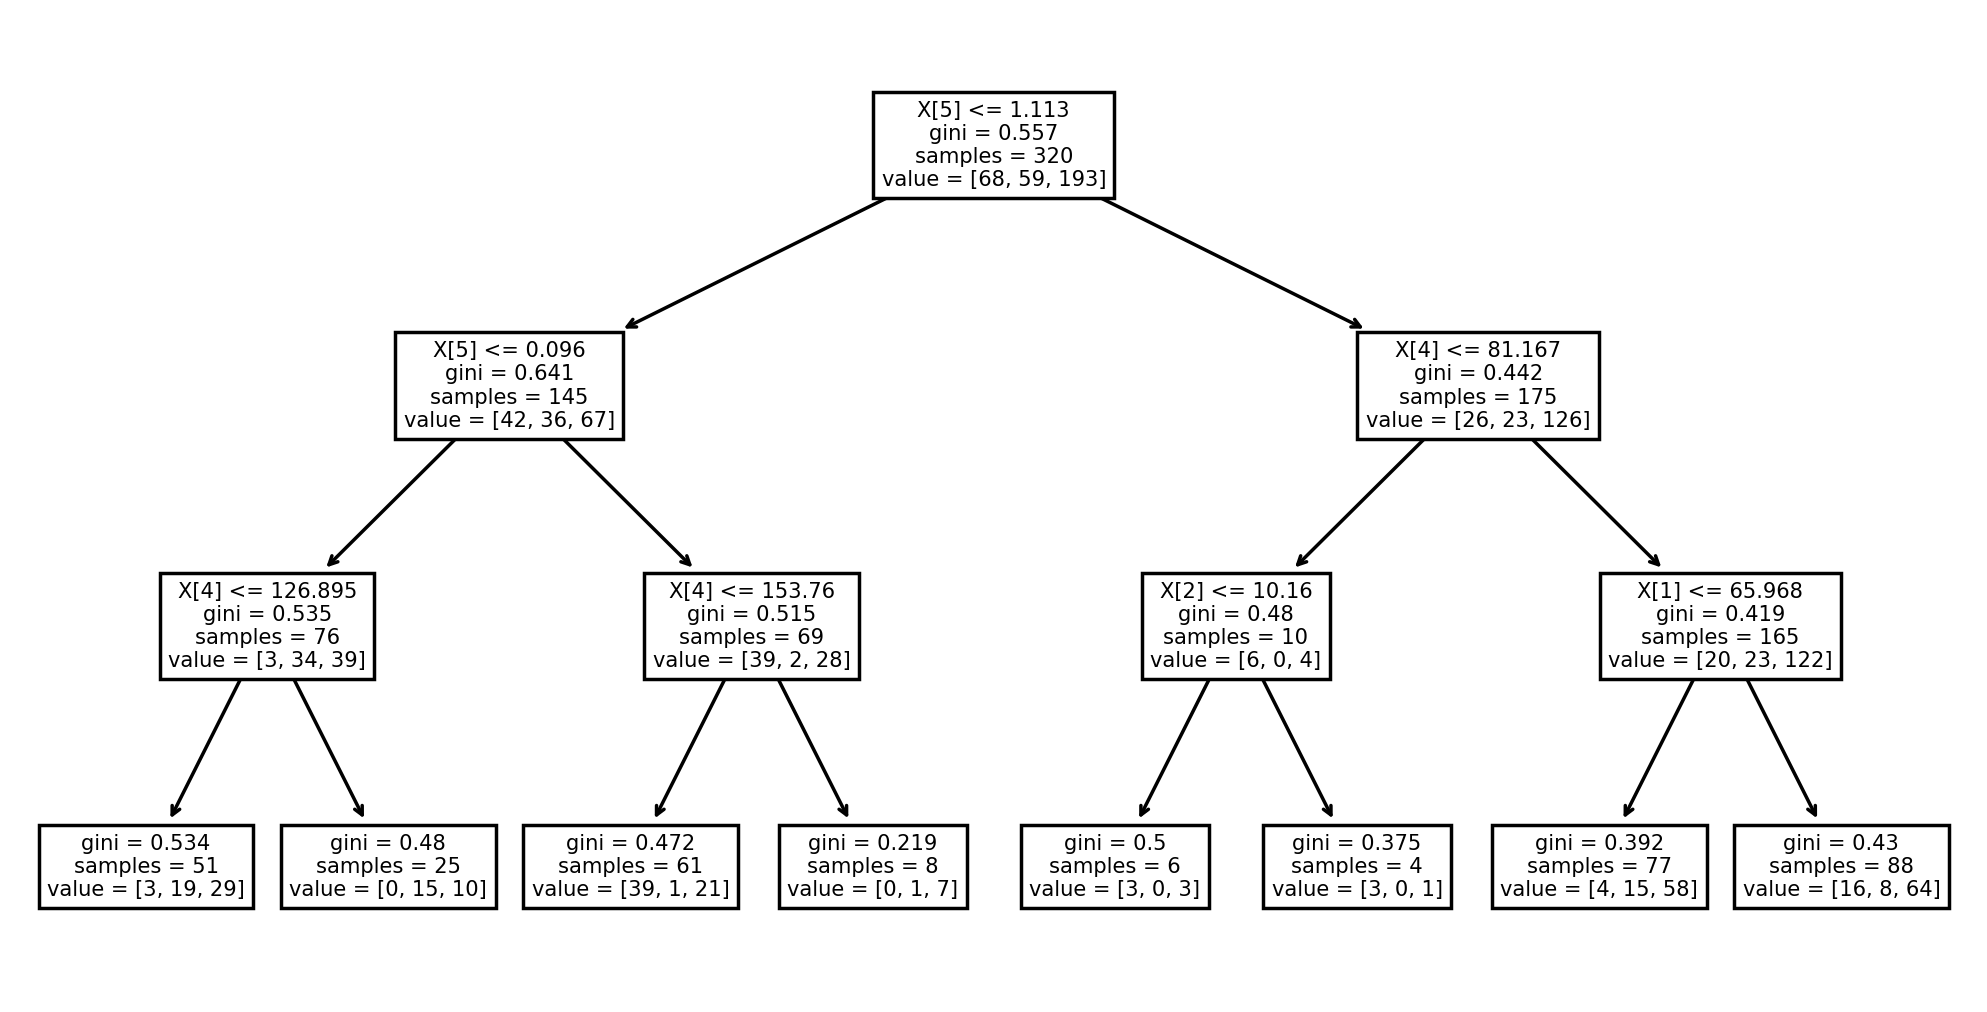

In [179]:
tree.plot_tree(dt)

[Text(0.5, 0.875, 'ShelveLoc <= 1.113\ngini = 0.557\nsamples = 320\nvalue = [68, 59, 193]\nclass = High'),
 Text(0.25, 0.625, 'ShelveLoc <= 0.096\ngini = 0.641\nsamples = 145\nvalue = [42, 36, 67]\nclass = High'),
 Text(0.125, 0.375, 'Price <= 126.895\ngini = 0.535\nsamples = 76\nvalue = [3, 34, 39]\nclass = High'),
 Text(0.0625, 0.125, 'gini = 0.534\nsamples = 51\nvalue = [3, 19, 29]\nclass = High'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 25\nvalue = [0, 15, 10]\nclass = Modarate'),
 Text(0.375, 0.375, 'Price <= 153.76\ngini = 0.515\nsamples = 69\nvalue = [39, 2, 28]\nclass = Low'),
 Text(0.3125, 0.125, 'gini = 0.472\nsamples = 61\nvalue = [39, 1, 21]\nclass = Low'),
 Text(0.4375, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [0, 1, 7]\nclass = High'),
 Text(0.75, 0.625, 'Price <= 81.167\ngini = 0.442\nsamples = 175\nvalue = [26, 23, 126]\nclass = High'),
 Text(0.625, 0.375, 'Advertising <= 10.16\ngini = 0.48\nsamples = 10\nvalue = [6, 0, 4]\nclass = Low'),
 Text(0.5625, 0.125, 'gi

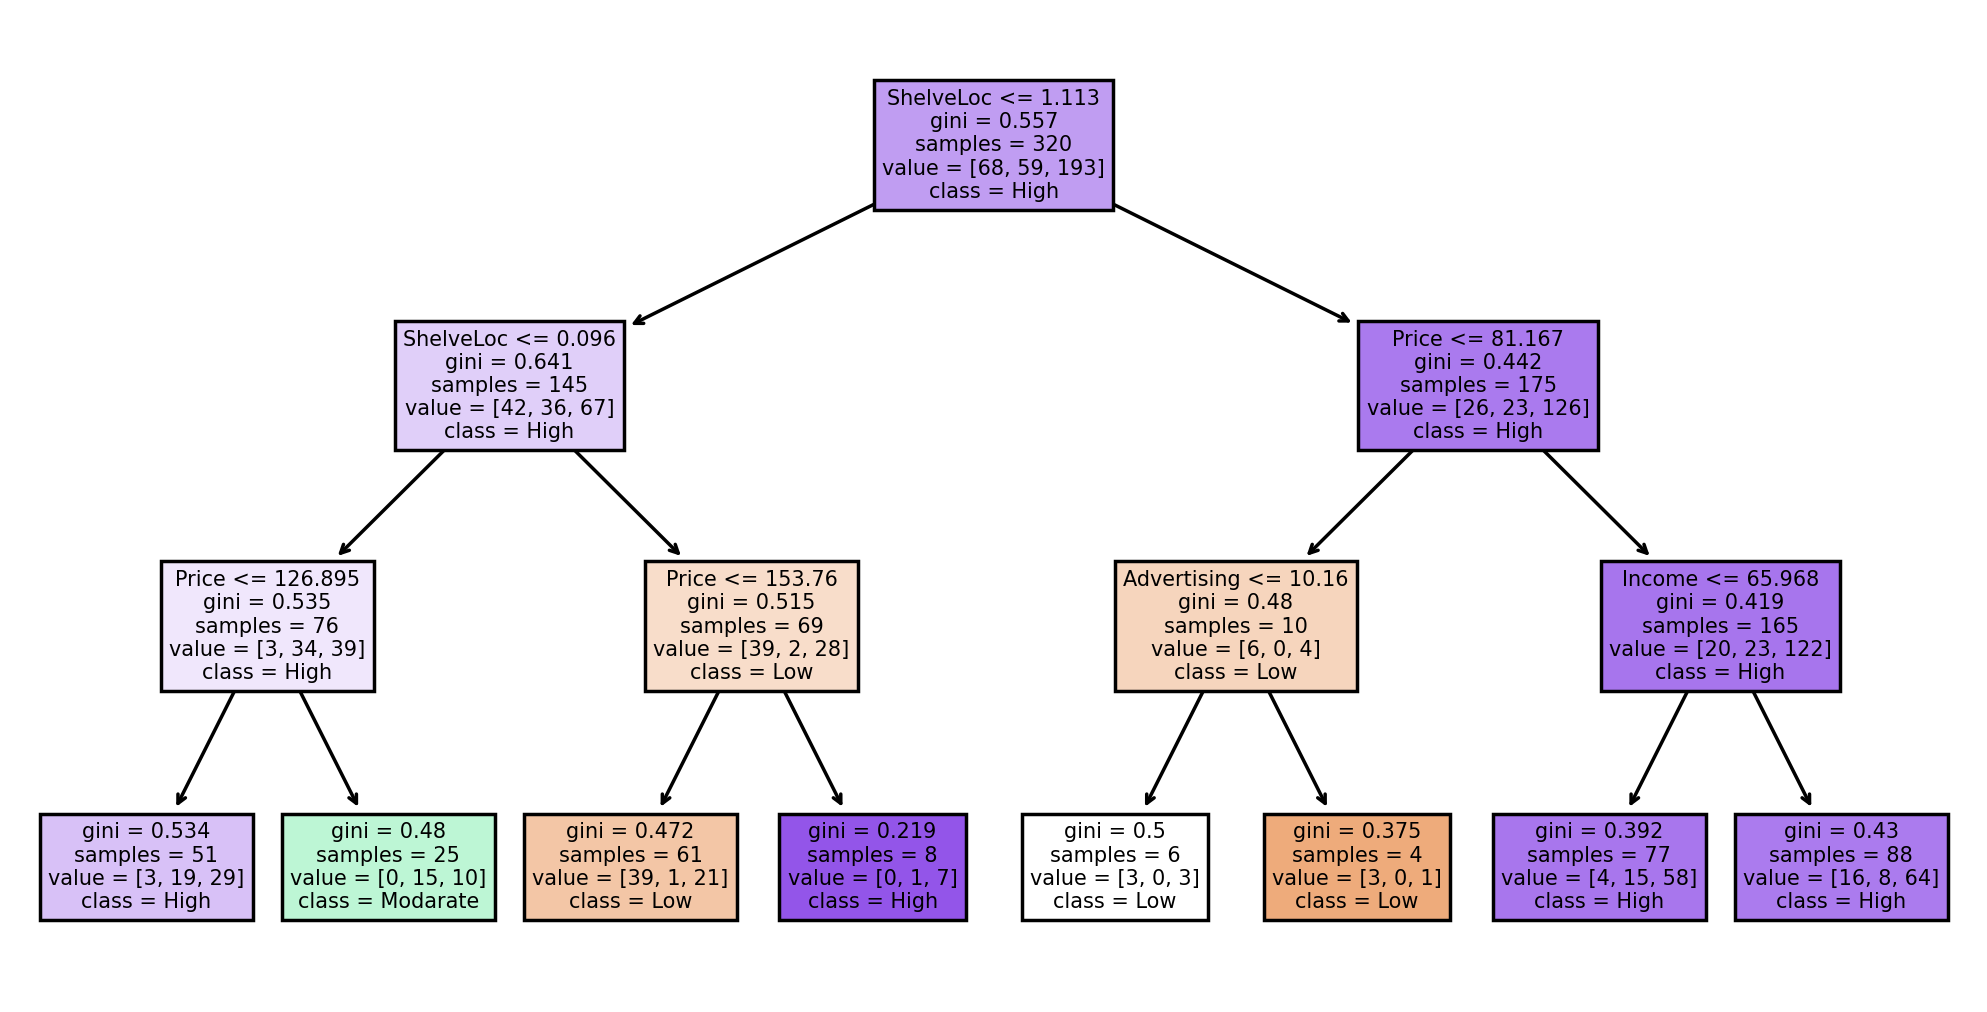

In [187]:
tree.plot_tree(dt,feature_names=x.columns,class_names=['Low','Modarate','High'],filled=True)